<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/bdm/F4/F4_Assignemnt3_Big_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title : YouTube Trending Video Dataset Analysis

[Kaggle Link](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset)

YouTube maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes).

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the IN, US, GB, DE, CA, FR, RU, BR, MX, KR, and JP regions (India, USA, Great Britain, Germany, Canada, France, Russia, Brazil, Mexico, South Korea, and, Japan respectively), with up to 200 listed trending videos per day.

Project Team:

LYE KAH HOOI (MCS231010)\
THONG YEE MOON (MCS231001)\
LEE SEOW MING THERESA (MCS231013)\
SITI NORAFIZAH BINTI AB AZIZ (MCS231018)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Upload the kaggle Token

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thongyeemoon","key":"03b620ecbe891a539bd2b576ee07daf2"}'}

## Import Dataset

Dataset was imported from Kaggle using API.
- Upload kaggle token.

In [3]:
! pip install kaggle --quiet

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                   LLM: 7 prompt training dataset                     41MB  2023-11-15 07:32:56           1029         88  1.0              
thedrcat/daigt-v2-train-dataset                                  DAIGT V2 Train Dataset                             29MB  2023-11-16 01:38:36            541         74  1.0              
thedrcat/daigt-proper-train-dataset                              DAIGT Proper Train Dataset                        119MB  2023-11-05 14:03:25           1099        114  1.0              
maso0dahmed/netflix-movies-and-shows                             

In [4]:
!kaggle datasets download -d rsrishav/youtube-trending-video-dataset

 99% 1.50G/1.51G [00:15<00:00, 116MB/s] 
100% 1.51G/1.51G [00:15<00:00, 102MB/s]


In [5]:
# Unzip folder downloaded
!unzip -u "/content/youtube-trending-video-dataset.zip"

Archive:  /content/youtube-trending-video-dataset.zip
  inflating: BR_category_id.json     
  inflating: BR_youtube_trending_data.csv  
  inflating: CA_category_id.json     
  inflating: CA_youtube_trending_data.csv  
  inflating: DE_category_id.json     
  inflating: DE_youtube_trending_data.csv  
  inflating: FR_category_id.json     
  inflating: FR_youtube_trending_data.csv  
  inflating: GB_category_id.json     
  inflating: GB_youtube_trending_data.csv  
  inflating: IN_category_id.json     
  inflating: IN_youtube_trending_data.csv  
  inflating: JP_category_id.json     
  inflating: JP_youtube_trending_data.csv  
  inflating: KR_category_id.json     
  inflating: KR_youtube_trending_data.csv  
  inflating: MX_category_id.json     
  inflating: MX_youtube_trending_data.csv  
  inflating: RU_category_id.json     
  inflating: RU_youtube_trending_data.csv  
  inflating: US_category_id.json     
  inflating: US_youtube_trending_data.csv  


In [6]:
import pandas as pd
BR= pd.read_csv('/content/BR_youtube_trending_data.csv')
CA= pd.read_csv('/content/CA_youtube_trending_data.csv')
DE= pd.read_csv('/content/DE_youtube_trending_data.csv')
FR= pd.read_csv('/content/FR_youtube_trending_data.csv')
GB= pd.read_csv('/content/GB_youtube_trending_data.csv')
IN= pd.read_csv('/content/IN_youtube_trending_data.csv')
JP= pd.read_csv('/content/JP_youtube_trending_data.csv')
KR= pd.read_csv('/content/KR_youtube_trending_data.csv')
MX= pd.read_csv('/content/MX_youtube_trending_data.csv')
RU= pd.read_csv('/content/RU_youtube_trending_data.csv')
US= pd.read_csv('/content/US_youtube_trending_data.csv')

##Dataset Overview and Import Library

A random 2 dataset from different region were selected to get a column overview.
- BR
-CA

**Library**
- numpy
- pandas
- matplotlib.pyplot
- seaborn
- re = regular expression



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
import re

In [8]:
print(BR.shape)
BR.head(3)

(240390, 16)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...


In [9]:
print(CA.shape)
CA.head(3)

(240342, 16)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."


## Dataset Merged

Both random daatset showed same outline with 16 columns.\
**11 Regions Abbreviation**
- IN = India
- US = USA
- GB = Great Britain
- DE = Germany
- CA = Canada
- FR = France
- RU = Russia
- BR = Brazil
- MX = Mexico
- KR = South Korea
- JP = Japan

In [10]:
# To add region column before combine for future references

BR["region"]="BR"
CA["region"]="CA"
DE["region"]="DE"
FR["region"]="FR"
GB["region"]="GB"
IN["region"]="IN"
JP["region"]="JP"
KR["region"]="KR"
MX["region"]="MX"
RU["region"]="RU"
US["region"]="US"

list_of_all_dataframes = [BR,CA,DE,FR,GB,IN,JP,KR,MX,RU,US]
sum_of_rows=0

for each in list_of_all_dataframes:
  print(each.shape[0])
  sum_of_rows += int(each.shape[0])
print ("total rows: " + str(sum_of_rows))

240390
240342
240336
240388
240391
227004
240378
237354
240198
220726
240387
total rows: 2607894


In [11]:
df = pd.concat([BR,CA,DE,FR,GB,IN,JP,KR,MX,RU,US])

df.shape

(2607894, 17)

In [12]:
df.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,region
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR


In [13]:
df.tail(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,region
240385,koSxGPCXQKI,42 Dugg - SpinDatBac (Official Audio),2023-11-17T05:00:25Z,UCFpoaM12604J5sn625SIn1A,42DuggVEVO,10,2023-11-25T00:00:00Z,Dugg|SpinDatBac|(Audio)|4PF/CMG/Interscope|Rec...,553133,24272,0,914,https://i.ytimg.com/vi/koSxGPCXQKI/default.jpg,False,False,Stream “SpinDatBac Here: https://42dugg.lnk.to...,US
240386,OKDahK8USV4,The Slang Word P (*) ssy Rolls Off The Tongue ...,2023-11-16T10:01:24Z,UCqmZ-EtD-ExXjF9Y28LbN2w,André 3000 - Topic,10,2023-11-25T00:00:00Z,André 3000|New Blue Sun|The Slang Word P(*)ssy...,844160,11633,0,1571,https://i.ytimg.com/vi/OKDahK8USV4/default.jpg,False,False,Provided to YouTube by EpicThe Slang Word P (*...,US


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607894 entries, 0 to 240386
Data columns (total 17 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   video_id           object
 1   title              object
 2   publishedAt        object
 3   channelId          object
 4   channelTitle       object
 5   categoryId         int64 
 6   trending_date      object
 7   tags               object
 8   view_count         int64 
 9   likes              int64 
 10  dislikes           int64 
 11  comment_count      int64 
 12  thumbnail_link     object
 13  comments_disabled  bool  
 14  ratings_disabled   bool  
 15  description        object
 16  region             object
dtypes: bool(2), int64(5), object(10)
memory usage: 323.3+ MB


In [15]:
df.describe(include='all')

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,region
count,2607894,2607894,2607894,2607894,2607893,2.607894e+06,2607894,2607894,2.607894e+06,2.607894e+06,2.607894e+06,2.607894e+06,2607894,2607894,2607894,2528571,2607894
unique,449678,457584,427850,44720,46967,NaN,1181,297420,NaN,NaN,NaN,NaN,449693,2,2,416989,11
top,2IkoKhr6Tss,Starlink Mission,2021-06-04T04:00:11Z,UC3IZKseVpdzPSBaWxBxundA,BANGTANTV,NaN,2021-03-02T00:00:00Z,[None],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/2IkoKhr6Tss/default.jpg,False,False,#shorts,GB
freq,151,613,172,7230,6220,NaN,4398,418949,NaN,NaN,NaN,NaN,151,2571806,2572282,2319,240391
mean,NaN,NaN,NaN,NaN,NaN,1.924963e+01,NaN,NaN,1.867454e+06,9.809163e+04,1.030821e+03,7.509691e+03,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6.609943e+00,NaN,NaN,6.058406e+06,3.629070e+05,2.344959e+04,7.209547e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.700000e+01,NaN,NaN,2.506260e+05,8.263000e+03,0.000000e+00,4.710000e+02,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN,5.865670e+05,2.274400e+04,0.000000e+00,1.287000e+03,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.400000e+01,NaN,NaN,1.448215e+06,6.710000e+04,3.060000e+02,3.610000e+03,NaN,NaN,NaN,NaN,NaN


## Missing Value

In [16]:
# check for missing values
df.isna().sum()

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          79323
region                   0
dtype: int64

In [17]:
# replace empty description = Not available

df['description'].fillna("Not Available",inplace=True)

In [18]:
# drop empty channelTitle

df.dropna(subset=['channelTitle'],inplace=True)

In [19]:
# Check any other missing values.

df.isna().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
region               0
dtype: int64

## Duplicate Value

All video_id is unique due to onetime off publication.

Based on dataset, the dataset will be update based on trending date.
Hence, there will having same video but based on ifferent trending date with same content

In [20]:
df.duplicated().all()

if df.duplicated().all()==True:
  print(df.duplicated().all())
  print("Found Duplicated Value")
else:
  print(df.duplicated().all())
  print("No duplicated value found")

False
No duplicated value found


In [21]:
df.drop_duplicates()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,region
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240382,RfLtAdSgWPQ,The Fourteenth Doctor is Here! | BBC Children ...,2023-11-17T20:16:34Z,UCcOkA2Xmk1valTOWSyKyp4g,Doctor Who,24,2023-11-25T00:00:00Z,doctor who|the doctor|dr who|bbc|doctor who bb...,1759511,70614,0,5535,https://i.ytimg.com/vi/RfLtAdSgWPQ/default.jpg,False,False,The Doctor accidentally lands the TARDIS at a ...,US
240383,Xty2gi5cMa8,Drake - First Person Shooter ft. J. Cole,2023-11-15T20:26:07Z,UCQznUf1SjfDqx65hX3zRDiA,DrakeVEVO,10,2023-11-25T00:00:00Z,Drake|First|Person|Shooter|OVO/Republic|Hip|Hop,16513753,814303,0,35058,https://i.ytimg.com/vi/Xty2gi5cMa8/default.jpg,False,False,Listen to For All The Dogs Scary Hours Edition...,US
240384,98eDPIoOV7w,E-40 Off Dat Mob (Music Video),2023-11-17T17:00:12Z,UCc-lKM4_OHLDDtvC1KFUIAQ,E40TV,10,2023-11-25T00:00:00Z,e-40|off that mob|bay area,634498,31270,0,1930,https://i.ytimg.com/vi/98eDPIoOV7w/default.jpg,False,False,New album Rule of Thumb: Rule 1 out now! https...,US
240385,koSxGPCXQKI,42 Dugg - SpinDatBac (Official Audio),2023-11-17T05:00:25Z,UCFpoaM12604J5sn625SIn1A,42DuggVEVO,10,2023-11-25T00:00:00Z,Dugg|SpinDatBac|(Audio)|4PF/CMG/Interscope|Rec...,553133,24272,0,914,https://i.ytimg.com/vi/koSxGPCXQKI/default.jpg,False,False,Stream “SpinDatBac Here: https://42dugg.lnk.to...,US


In [22]:
# # To check any duplicate video_id within a region

# df.duplicated(subset=['video_id','region'],keep='last').sum()

# # Decided to keep only video with latest trending date to avoid overlapping of view count within a region

# df.sort_values(['region','trending_date'],inplace=True)

# # order verification

# df['trending_date'].array

# # remove duplicated video due to different trending date
# df.drop_duplicates(['video_id','region'], keep='last',inplace=True)


# #Check Status
# if df.duplicated(subset=['video_id','region']).sum() == 0:
#   print(df.duplicated(subset=['video_id','region']).sum())
#   print("No duplicated value")
# else:
#   print(df.duplicated(subset=['video_id','region']).sum())
#   print("Found duplicated value")


# # Check dropped row
# df.shape
# print(df.shape)

# Dropped_rows= sum_of_rows-int(df.shape[0])

# print("Number of dropped value [missing & duplicated]:")
# print(Dropped_rows)

## Data Type Transformation

In [23]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
region               object
dtype: object

In [24]:
df['categoryId']=df['categoryId'].astype(object)

In [25]:
df['trending_date']= pd.to_datetime(df['trending_date'])
df['publishedAt']= pd.to_datetime(df['publishedAt'])

In [26]:
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelId                         object
channelTitle                      object
categoryId                        object
trending_date        datetime64[ns, UTC]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
description                       object
region                            object
dtype: object

In [27]:
df.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,region
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49+00:00,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12 00:00:00+00:00,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13+00:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00+00:00,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR


## Uni-Variable Analysis / Data Discover
 1. video_id
 2. title
 3. publishedAt
 4. channelID
 5. channelTitle
 6. categoryId
 7. trending_date
 8. tags
 9. view_count
 10. likes
 11. dislikes
 12. comment_count
 13. thumbnail_link
 14. comments_disable
 15. ratings_disable
 16. description


### 1. video_id

In [28]:
df['video_id'].describe()

count         2607893
unique         449678
top       2IkoKhr6Tss
freq              151
Name: video_id, dtype: object

In [29]:
total_video_count=df['video_id'].value_counts().sort_values(ascending=False).rename_axis('video').reset_index(name='count')
total_video_count

,video,count
0,2IkoKhr6Tss,151
1,S2dRcipMCpw,138
2,yhB3BgJyGl8,134
3,XA2YEHn-A8Q,131
4,6-kZmn54vOs,130
...,...,...
449673,A0w6nCFjBMc,1
449674,Ghj4bRtE9Fs,1
449675,EKVE4LKUN_E,1
449676,jlxD5awzfSI,1


In [30]:
common_video=total_video_count['count'].value_counts().rename_axis('region_duplicated video').reset_index(name='count')
common_video

,region_duplicated video,count
0,2,69160
1,1,66648
2,5,47577
3,3,46914
4,4,45088
...,...,...
115,114,1
116,109,1
117,108,1
118,106,1


The higher the duplicated value 1 to 11 , the better the familarity across different country

For example:\
There are 209 of same videos are existing in 11 country's trending.

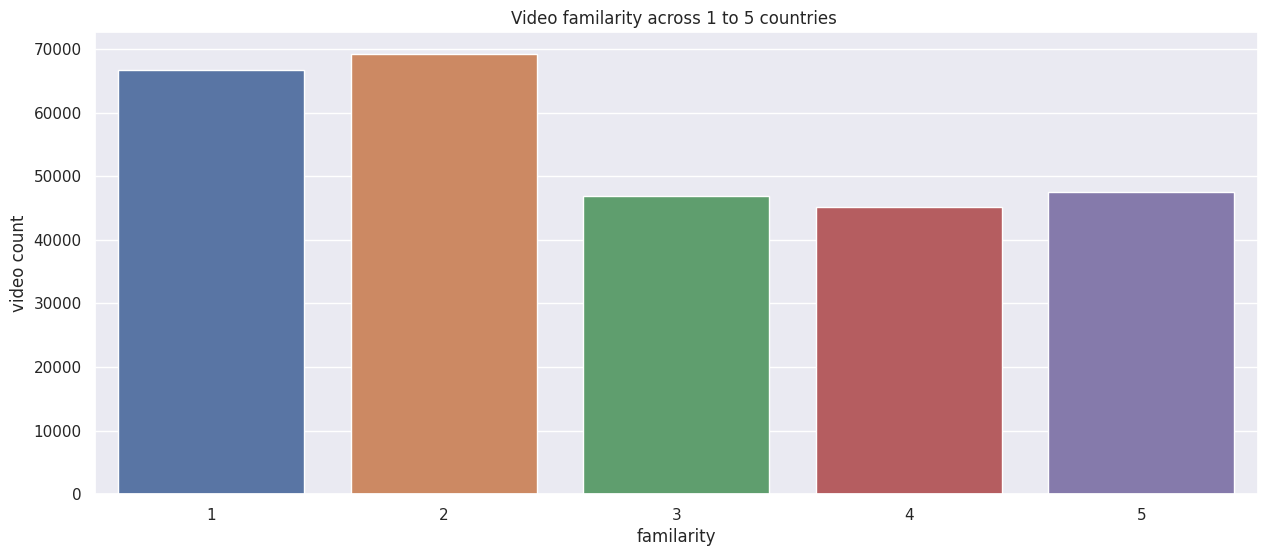

In [31]:
plt.figure(figsize=(15, 6))
sns.barplot(x='region_duplicated video', y='count', data=common_video.nlargest(5,'count'))
plt.title("Video familarity across 1 to 5 countries ")
plt.xlabel('familarity')
plt.ylabel("video count")
plt.show()

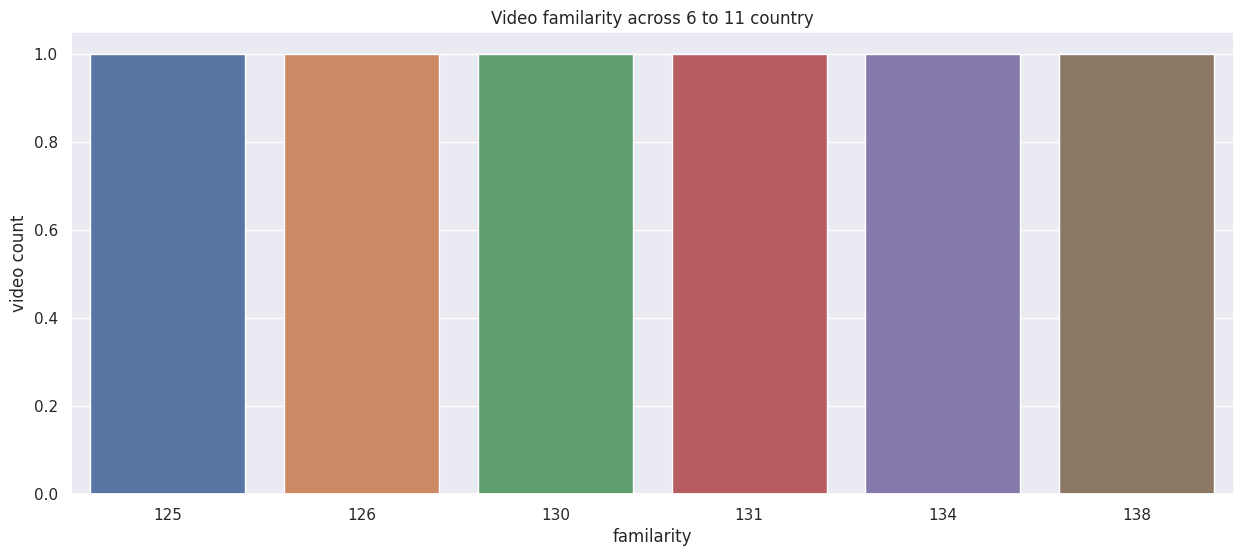

In [32]:
plt.figure(figsize=(15, 6))
sns.barplot(x='region_duplicated video', y='count', data=common_video.nsmallest(6,'count'))
plt.title("Video familarity across 6 to 11 country")
plt.xlabel('familarity')
plt.ylabel("video count")
plt.show()

In [33]:
video_count_by_region=df.groupby('region')['video_id'].count().reset_index()
video_count_by_region

,region,video_id
0,BR,240390
1,CA,240342
2,DE,240336
3,FR,240388
4,GB,240391
5,IN,227003
6,JP,240378
7,KR,237354
8,MX,240198
9,RU,220726


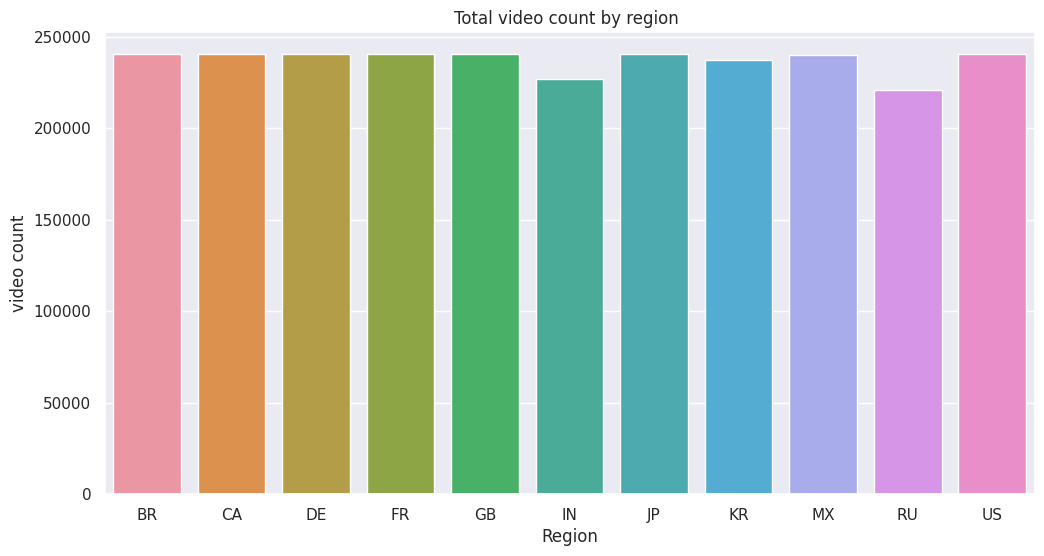

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='video_id', data=video_count_by_region)
plt.title("Total video count by region ")
plt.xlabel('Region')
plt.ylabel("video count")
plt.show()

### 2. title

In [35]:
df['title'].describe()

count              2607893
unique              457584
top       Starlink Mission
freq                   613
Name: title, dtype: object

In [36]:
title_count_by_region=df.groupby('region')['title'].count()
# title_count.columns=["title","count"]
title_count_by_region

# title_count=df['title'].value_counts().rename_axis('title').reset_index(name='count')

region
BR    240390
CA    240342
DE    240336
FR    240388
GB    240391
IN    227003
JP    240378
KR    237354
MX    240198
RU    220726
US    240387
Name: title, dtype: int64

In [37]:
total_title_count=df['title'].value_counts().sort_values(ascending=False).rename_axis('title').reset_index(name='count')
total_title_count

,title,count
0,Starlink Mission,613
1,EXO 엑소 'Don't fight the feeling' MV,151
2,Billie Eilish - Lost Cause (Official Music Video),138
3,7 Days Stranded At Sea,134
4,TWICE Alcohol-Free M/V,131
...,...,...
457579,Класстастар жиналды | «КАЙРАТ» оныншы серия,1
457580,В деле о пьяном ДТП Ефремова появились новые п...,1
457581,Munisa Rizaeva Yorqinhuja xamda Misha tuyda🎼🎼🙌🏻,1
457582,ОХУДИВИТЕЛЬНЫЕ АВТО ЛАЙФХАКИ,1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50641 (\N{HANGUL SYLLABLE EG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


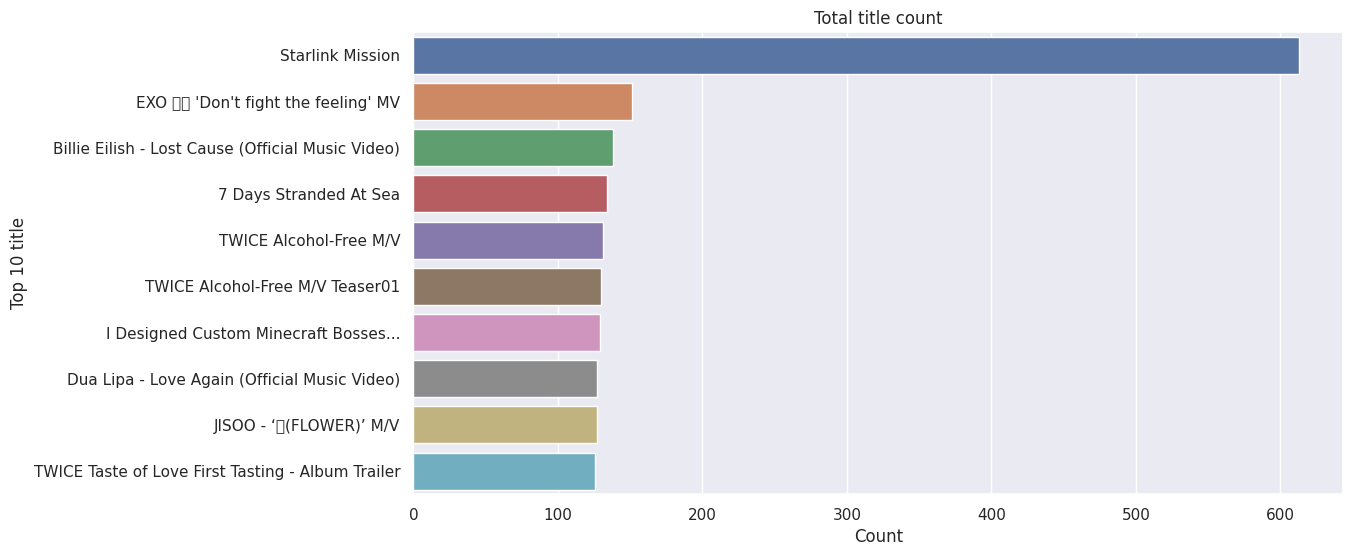

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='title', data=total_title_count.nlargest(10, 'count'))
plt.title("Total title count")
plt.xlabel('Count')
plt.ylabel("Top 10 title")
plt.show()

There are repeated Starlink Mission title with different unique video_id

In [39]:
# to show title Starlink with different video ID

df[df['title']=="Starlink Mission"]['video_id'].unique()

array(['jTMJK7wb0rM', '_j4xR7LMCGY', 'W0MGgQZIYNk', 'UM8CDDAmp98',
       '2gbVgTxLgN0', 'J442-ti-Dhg', '84Nct_Q9Lqw', 'fe6HBw1y6bA',
       'L0dkyV09Zso', 'DpsrExXlQrA', 'U4sWbTfrzj8', 'JKf45ATgATc',
       'Uy9Jn-3vuPs', 'RBxkRKZ34yo', 'xpl_JnG7rcg', '4372QYiPZB4',
       'AtmtP4vouSY', '4_ePBpwMhns', 'Yov854ZT1lg', 'UY3fZ6PwuUY',
       's6yBwQSrtFY', 'oCN-BMU9-hM', 'u_A7xdnVllM', '_c738Z_zQR0',
       'ZlQHF_yBkMQ', 'iYtH2khNIgU', 'NQPNRwpGWXc', 'bNAebzSvWt4',
       'oe4S-q_gQaU', 'kpoMcjTvylk', 'UytWKGvbIFs', 'qvwF3P8eF6Q',
       'a15czI9B91c', 'tdgg_qwj-hI', 'xRu-ekesDyY', 'zSJWK_pmXVw',
       'eiKOMCRymsw', 'M018DAaNd_E', 'iS9cT0vz3ng', 'J71s2KmkSrc',
       'q4Ed3EBx90s', 'ypb2sDdUkRo', 'uqAppamdGyo', '7VWcjgYfJ9U',
       'BuXdtORWrpg', 'ck5z0uMGz8s', '07RGJ04HRns', 'a2lxdOPyR3Q',
       'erH5mrvQkbc', 'Bhe91f5smxM', 'Dy68lCXLsGc', 'p28VA2pfa2I',
       'Z7c9JPUHpPM', 'gdSHi5Js104', 'alkJWrqffcw', 'rmlRxzxYlyM'],
      dtype=object)

This proved that, title is not suitable use for references due to it is not unique.

video_id will be top priority

### 3. publishedAt

In [40]:
df['publishedAt'].dt.date.min()

datetime.date(2020, 7, 14)

In [41]:
df['publishedAt'].dt.time.min()

datetime.time(0, 0)

In [42]:
df['publishedAt'].dt.date.max()

datetime.date(2023, 11, 25)

In [43]:
df['publishedAt'].dt.time.max()

datetime.time(23, 59, 59)

The timeline for the dataset is from 14/7/2020 until 25/11/2023, approximately 3 years and 4 months data.

### 4. channelID

In [44]:
df['channelId'].describe()

count                      2607893
unique                       44720
top       UC3IZKseVpdzPSBaWxBxundA
freq                          7230
Name: channelId, dtype: object

In [45]:
# unique value counts
counts_df = df['channelId'].value_counts().rename_axis('channelId').reset_index(name='count')
counts_df

,channelId,count
0,UC3IZKseVpdzPSBaWxBxundA,7230
1,UCLkAepWjdylmXSltofFvsYQ,6220
2,UCaO6TYtlC8U5ttz62hTrZgg,5842
3,UCEf_Bc-KVd7onSeifS3py9g,5782
4,UCB_qr75-ydFVKSF9Dmo6izg,4592
...,...,...
44715,UCJiG7h7BGJ3Yen1NmqWdzVw,1
44716,UCii1Q-05uzxaegs8BcUBN3w,1
44717,UCOu_NqUDMFEJQPAFmZbs4ww,1
44718,UCSmISBTOABrjuR15BI9Pv6g,1


### 5. channelTitle

In [46]:
# change datetime format of "trending_date" and "publishedAt"
df['trending_date']=pd.to_datetime(df['trending_date'],format='%Y-%m-%dT%H:%M:%SZ')
df['publishedAt']=pd.to_datetime(df['publishedAt'],format='%Y-%m-%dT%H:%M:%SZ')
df.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,region
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49+00:00,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12 00:00:00+00:00,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13+00:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00+00:00,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR


In [47]:
import pandas as pd

# Convert 'trending_date' to datetime format if not already
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Set today's date (replace '2023-11-20' with the actual date)
today = pd.Timestamp('2023-11-20')

# Ensure 'trending_date' is timezone-naive
df['trending_date'] = df['trending_date'].dt.tz_localize(None)

# Filter the dataset to include videos until today
condition = df['trending_date'] <= today
trending_videos_until_today = df[condition]

# Display the resulting dataset
print(trending_videos_until_today)

           video_id                                              title  \
0       s9FH4rDMvds     LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!   
1       jbGRowa5tIk                          ITZY “Not Shy” M/V TEASER   
2       3EfkCrXKZNs                      Oh Juliana PARÓDIA - MC Niack   
3       gBjox7vn3-g   Contos de Runeterra: Targon | A Estrada Tortuosa   
4       npoUGx7UW7o  Entrevista com Thammy Miranda | The Noite (10/...   
...             ...                                                ...   
239382  UvGr4GZSduU                         New York Marathon RACE DAY   
239383  oJ-i5q9OH8E  Doja Cat answers the hard - hitting questions YTP   
239384  kVbtUR7wDQU  RETURN OF TITAN TV MAN!!!! | skibidi toilet 67...   
239385  8VUFLZnpbNw                          Welcome to CREATOR BINGO!   
239386  zVN3XJ-jse8                   Moving into My New NYC Apartment   

                     publishedAt                 channelId  \
0      2020-08-11 22:21:49+00:00  UCGfBwrCoi9ZJjK

In [48]:
#To display the relationship top 20 channel title with view count for exploration
top_20_videos_most_viewed = trending_videos_until_today.groupby(['channelTitle']).max().sort_values('view_count',ascending=False).loc[:,'view_count'][:20]
top_20_videos_most_viewed = top_20_videos_most_viewed.reset_index()

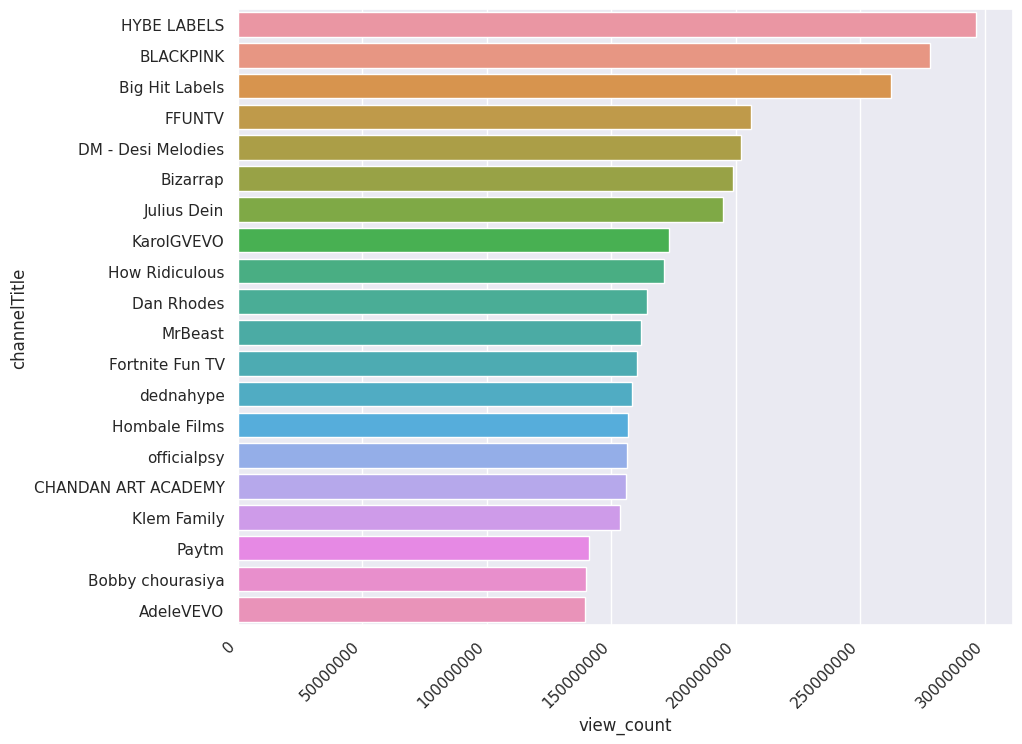

In [49]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,8))
sns.barplot(x = "view_count", y = "channelTitle", data = top_20_videos_most_viewed)
# Set the x-axis ticks with higher precision
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation
plt.ticklabel_format(style='plain', axis='x')  # Use plain formatting

plt.show()

### 6. categoryId
CategoryId has matched with category title and assigns it to the category_name.

In [50]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'region'],
      dtype='object')

In [51]:
BR1 = pd.read_json('/content/BR_category_id.json')
CA1 = pd.read_json('/content/CA_category_id.json')
DE1 = pd.read_json('/content/DE_category_id.json')
FR1 = pd.read_json('/content/FR_category_id.json')
GB1 = pd.read_json('/content/GB_category_id.json')
IN1 = pd.read_json('/content/IN_category_id.json')
JP1 = pd.read_json('/content/JP_category_id.json')
KR1 = pd.read_json('/content/KR_category_id.json')
MX1 = pd.read_json('/content/MX_category_id.json')
RU1 = pd.read_json('/content/RU_category_id.json')
US1 = pd.read_json('/content/US_category_id.json')

# To add region column before combine for future references

BR1["categories"]="BR"
CA1["categories"]="CA"
DE1["categories"]="DE"
FR1["categories"]="FR"
GB1["categories"]="GB"
IN1["categories"]="IN"
JP1["categories"]="JP"
KR1["categories"]="KR"
MX1["categories"]="MX"
RU1["categories"]="RU"
US1["categories"]="US"

list_of_all_dataframes = [BR1,CA1,DE1,FR1,GB1,IN1,JP1,KR1,MX1,RU1,US1]
sum_of_rows=0

for each in list_of_all_dataframes:
  print(each.shape[0])
  sum_of_rows += int(each.shape[0])
print ("total rows: " + str(sum_of_rows))

#
df_cat = pd.concat([BR1,CA1,DE1,FR1,GB1,IN1,JP1,KR1,MX1,RU1,US1])

df.shape

31
31
31
31
31
31
31
31
31
31
32
total rows: 342


(2607893, 17)

In [52]:
most_frequent_type=df.groupby(['categoryId']).count().sort_values('video_id',ascending=False).loc[:,'video_id'][:10]
most_frequent_type=most_frequent_type.reset_index()
most_frequent_type=most_frequent_type.rename(columns={'video_id': 'count'})

for idx,most_freq_category in enumerate(most_frequent_type['categoryId']):
    for category in df_cat['items']:
        if str(most_freq_category)==category['id']:
            most_frequent_type.at[idx,'category_name']=category['snippet']['title']
            break

In [53]:
df_cat.head(2)

,kind,etag,items,categories
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW...",BR
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG...",BR


In [54]:
most_frequent_type.head(10)

,categoryId,count,category_name
0,24,666272,Entertainment
1,10,398755,Music
2,20,356791,Gaming
3,22,304176,People & Blogs
4,17,277930,Sports
5,23,139833,Comedy
6,25,98671,News & Politics
7,1,80286,Film & Animation
8,26,74613,Howto & Style
9,28,61553,Science & Technology


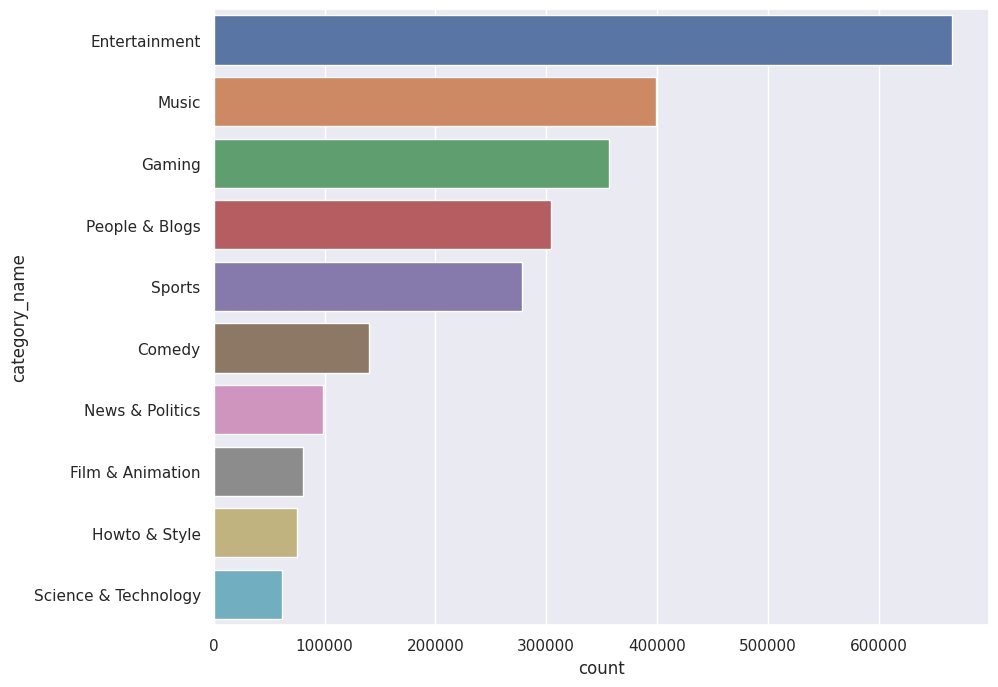

In [55]:
plt.figure(figsize=(10,8))
sns.barplot(y = "category_name", x = "count", data = most_frequent_type)
plt.show()

### 7. trending_date

In [56]:
df['trending_date'].dt.date.min()

datetime.date(2020, 8, 12)

In [57]:
df['trending_date'].dt.date.max()

datetime.date(2023, 11, 25)

In [58]:
df.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,region
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49+00:00,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR


In [59]:
videos_trending_days = trending_videos_until_today.groupby('title')['trending_date'].unique().to_frame()
videos_trending_days['days'] = videos_trending_days.trending_date.transform(lambda x: len(x))
videos_trending_days = videos_trending_days.sort_values(by='days', ascending=False).reset_index()[:20]

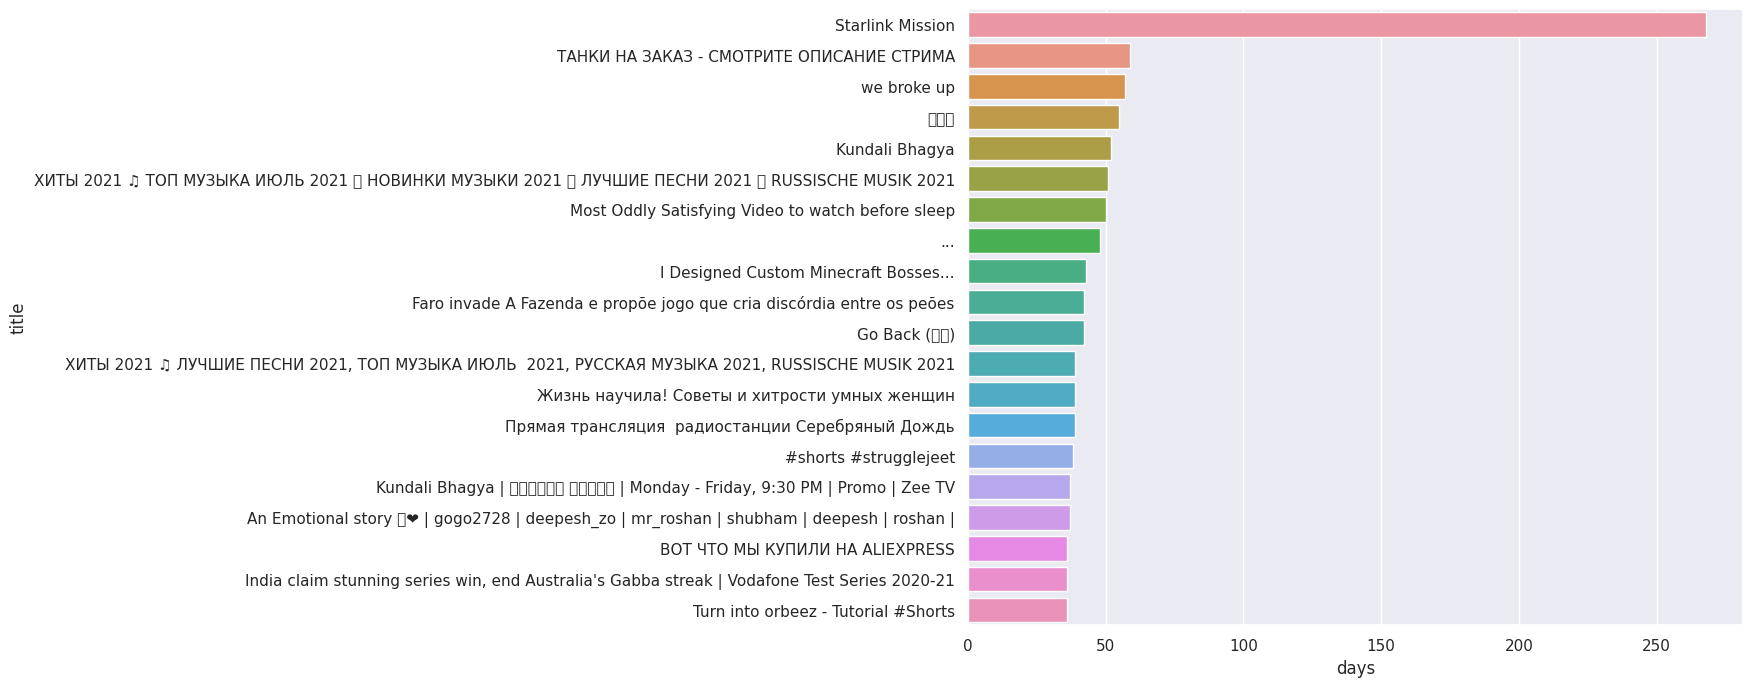

In [60]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,8))
sns.barplot(x = "days", y = "title", data = videos_trending_days)
plt.show()

### 8. tags
To find the most popular 20 YouTube tags with view count

In [61]:
df['tags']

0         pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...
1         JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...
2         OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...
3         Riot|Riot Games|League of Legends|lol|trailer|...
4         The Noite|The Noite com Danilo Gentili|Danilo ...
                                ...                        
240382    doctor who|the doctor|dr who|bbc|doctor who bb...
240383      Drake|First|Person|Shooter|OVO/Republic|Hip|Hop
240384                           e-40|off that mob|bay area
240385    Dugg|SpinDatBac|(Audio)|4PF/CMG/Interscope|Rec...
240386    André 3000|New Blue Sun|The Slang Word P(*)ssy...
Name: tags, Length: 2607893, dtype: object

In [62]:
tag_distribution = df['tags'].value_counts()
print(tag_distribution)

[None]                                                                                                                                                                                                                                                                                                                                                                                                                                                                        418949
HYBE|HYBE LABELS|하이브|하이브레이블즈                                                                                                                                                                                                                                                                                                                                                                                                                                                    4734
방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정국|k-pop|방탄|j-hop

In [63]:
tags_counts = trending_videos_until_today['tags'].str.split('|').explode().value_counts()
tags_counts = tags_counts.reset_index(name='count')
tags_counts = tags_counts.rename(columns={'index': 'tag'})
tags_counts = tags_counts.sort_values(by='count', ascending=False).head(20)
tags_counts

,tag,count
0,[None],417108
1,funny,61731
2,minecraft,57949
3,vlog,47886
4,comedy,47583
5,challenge,36696
6,football,30994
7,highlights,27973
8,tiktok,23215
9,rap,22729


In [64]:
#To ignore the 'None" tag
tags_counts_filtered = tags_counts[tags_counts['tag'] != '[None]']

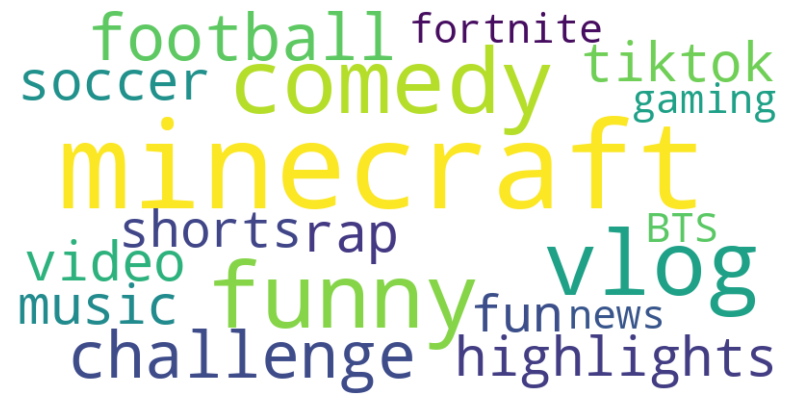

In [65]:
from wordcloud import WordCloud

# Combine all tags into a single string
all_tags = " ".join(tags_counts_filtered['tag'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_tags)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 9. view_count

In [66]:
df['view_count'].describe()

count    2.607893e+06
mean     1.867454e+06
std      6.058408e+06
min      0.000000e+00
25%      2.506260e+05
50%      5.865670e+05
75%      1.448217e+06
max      2.963142e+08
Name: view_count, dtype: float64

In [67]:
df.groupby('region')['view_count'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
BR,240390.0,1.539025e+06,5.626432e+06,0.0,191578.25,448674.5,1113072.00,278080610.0
CA,240342.0,2.398861e+06,6.293793e+06,0.0,443852.25,909125.5,2063207.50,264407389.0
DE,240336.0,1.576411e+06,5.501292e+06,0.0,129696.75,317645.5,1005741.50,219110491.0
FR,240388.0,1.036227e+06,4.426980e+06,0.0,99326.50,223569.5,597417.50,232649205.0
GB,240391.0,2.164506e+06,5.876195e+06,0.0,342584.00,778685.0,1853266.50,208581468.0
IN,227003.0,2.870421e+06,7.044481e+06,0.0,396457.50,986814.0,2510247.00,264407389.0
JP,240378.0,1.343286e+06,5.358219e+06,0.0,295940.50,509252.5,1003155.75,289350312.0
KR,237354.0,1.778748e+06,6.736222e+06,0.0,351917.50,674197.0,1347581.75,296314174.0
MX,240198.0,2.334041e+06,6.606866e+06,0.0,371894.50,820183.0,1993741.50,278080610.0


In [68]:
df['view_count'].min()

0

In [69]:
df['view_count'].max()

296314174

In [70]:
# remove all duplicated video due to different trending date (excluding consider the region)
df_sort_trending=df.sort_values(['trending_date'])
df_sort_trending.duplicated(['video_id'])
df_sort_trending.drop_duplicates(['video_id'],keep='last',inplace=True)

df_sort_trending.sort_values(by='view_count')[['video_id','title','trending_date','view_count']].nlargest(10, 'view_count')

,video_id,title,trending_date,view_count
55138,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-06-04,296314174
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-09-10,277791741
3999,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-31,262319276
73564,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-08-08,206202284
64049,DUwlGduupRI,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,2021-07-16,202091414
179989,CocEMWdc7Ck,SHAKIRA || BZRP Music Sessions #53,2023-01-25,198682756
67539,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-24,194795844
68742,qF0N19MgI3Q,JETSKI WAX PRANK!! 🤣 - #Shorts,2021-07-15,194625542
79542,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-22,192376395
4981,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-09-05,184778248


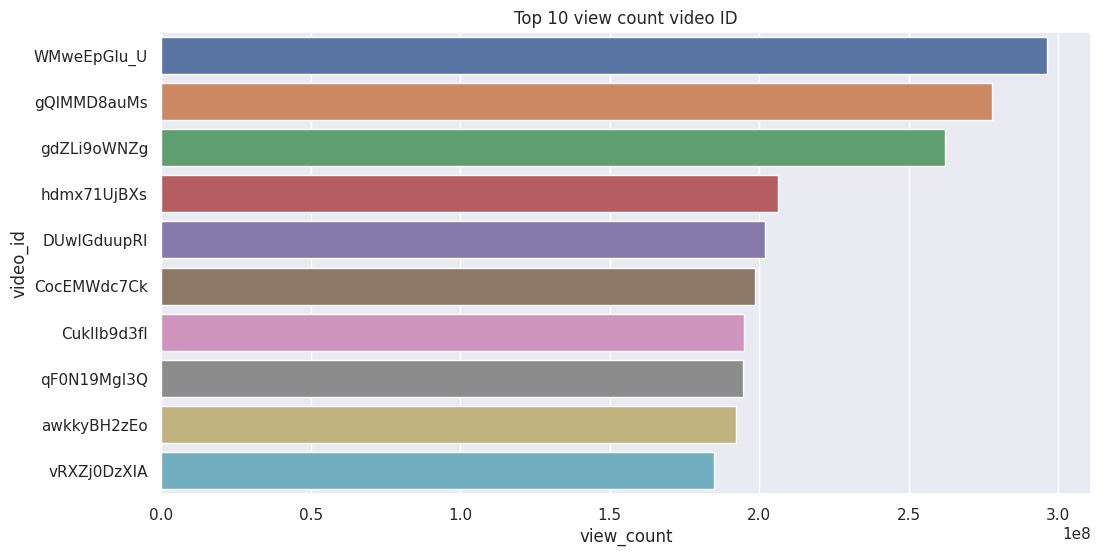

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='view_count', y='video_id',data=df_sort_trending.sort_values(by='view_count').nlargest(10, 'view_count')).set(title='Top 10 view count video ID')
plt.show()

In [72]:
# box plot
# keep only video with latest trending date to avoid overlapping of view count within a region
df_remove_trend=df.sort_values(['region','trending_date'])
df_remove_trend.drop_duplicates(['video_id','region'], keep='last',inplace=True)

[Text(0.5, 1.0, 'Mean_view count by region')]

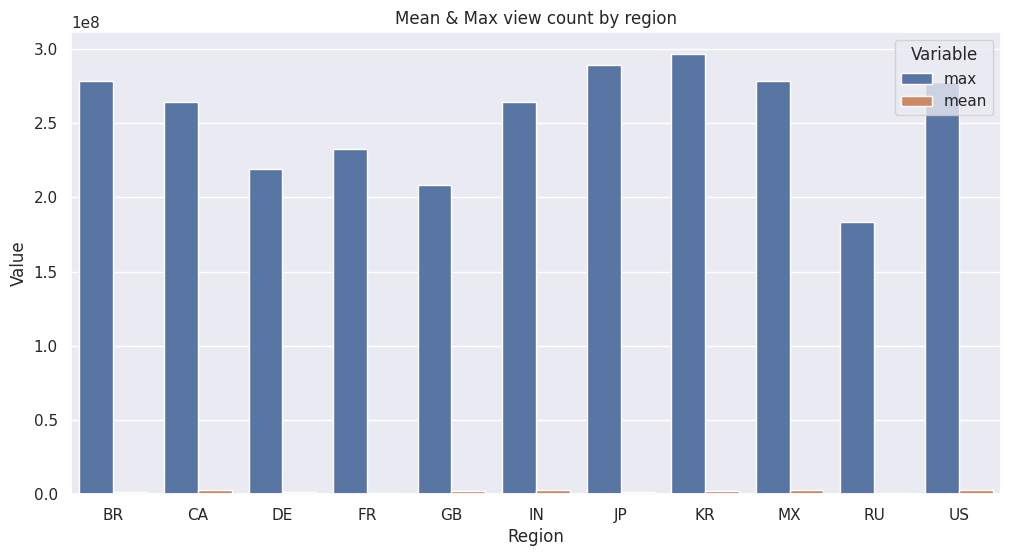

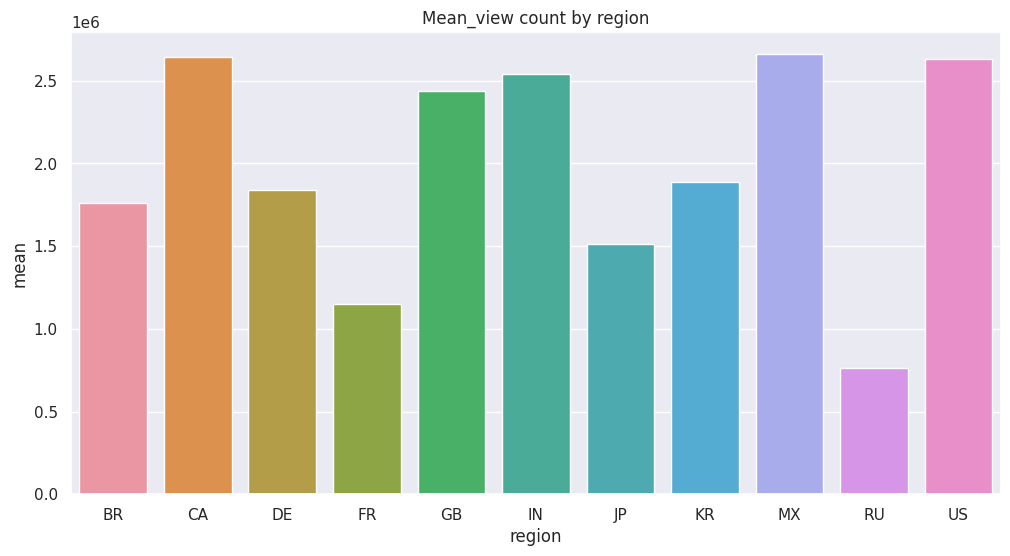

In [73]:
region_view=pd.DataFrame(df_remove_trend.groupby(["region"])["view_count"].agg(["min","max","mean"]).reset_index())
region_view
# since min =0, drop min
region_view2 = region_view.drop(['min'], axis=1)
region_view2

tidy = region_view2.melt(id_vars='region').rename(columns=str.title)
tidy

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy).set(title='Mean & Max view count by region')

# Since mean not able to observe, a separate mean graph need to be plot
plt.figure(figsize=(12,6))
sns.barplot(x='region',y='mean',data=region_view).set(title='Mean_view count by region')

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'View_count'),
 Text(0.5, 1.0, 'view count box plot by region')]

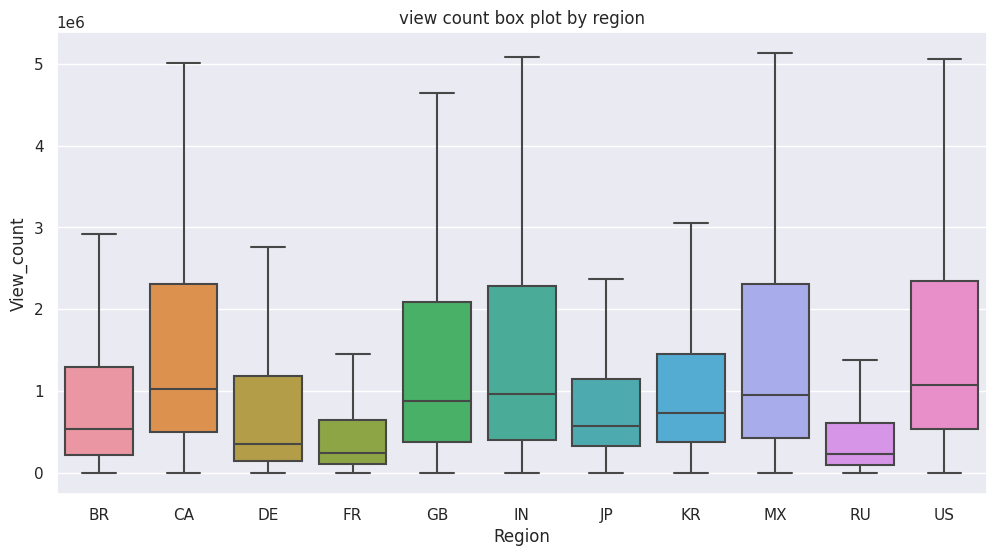

In [74]:
# df_remove_trend
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='view_count', data=df_remove_trend,showfliers=False).set(xlabel='Region',ylabel='View_count',title="view count box plot by region")

### 10. likes

In [75]:
df['likes'].describe()

count    2.607893e+06
mean     9.809164e+04
std      3.629071e+05
min      0.000000e+00
25%      8.263000e+03
50%      2.274400e+04
75%      6.710000e+04
max      1.646425e+07
Name: likes, dtype: float64

In [76]:
df.groupby('region')['likes'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
BR,240390.0,97322.531095,356718.743437,0.0,12589.25,28194.5,70100.75,16213756.0
CA,240342.0,122762.793569,361420.734860,0.0,17275.00,41394.0,103428.75,16021548.0
DE,240336.0,84470.468282,334618.877552,0.0,5320.00,14299.0,47506.50,15460845.0
FR,240388.0,64915.040069,300527.559110,0.0,5395.00,12377.0,35905.25,15735588.0
GB,240391.0,109844.212504,347946.493942,0.0,11179.00,32677.0,89101.00,15246514.0
IN,227003.0,145192.199244,402382.603503,0.0,13161.00,39748.0,122627.50,16115240.0
JP,240378.0,57198.609124,342351.535194,0.0,4953.00,10916.0,26025.75,16369715.0
KR,237354.0,74133.747845,410436.786593,0.0,5944.00,11773.0,27575.75,16464253.0
MX,240198.0,139012.870757,412693.448902,0.0,15369.00,42023.0,114583.75,16213758.0


In [77]:
df['likes'].min()

0

In [78]:
df['likes'].max()

16464253

In [79]:
# df_sort_trending=consider video lastest trending date only
df_sort_trending.sort_values(by='likes')[['video_id','title','trending_date','likes']].nlargest(10, 'likes')

,video_id,title,trending_date,likes
55138,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-06-04,16464253
3999,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-31,16254791
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-09-10,12993894
67539,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-24,12767906
79542,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-22,12177724
4981,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-09-05,11795687
18935,-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,2020-12-01,11650994
96555,0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",2021-12-02,10926910
133936,kXpOEzNZ8hQ,BTS (방탄소년단) 'Yet To Come (The Most Beautiful M...,2022-06-23,9713685
9696,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,2020-10-13,9537518


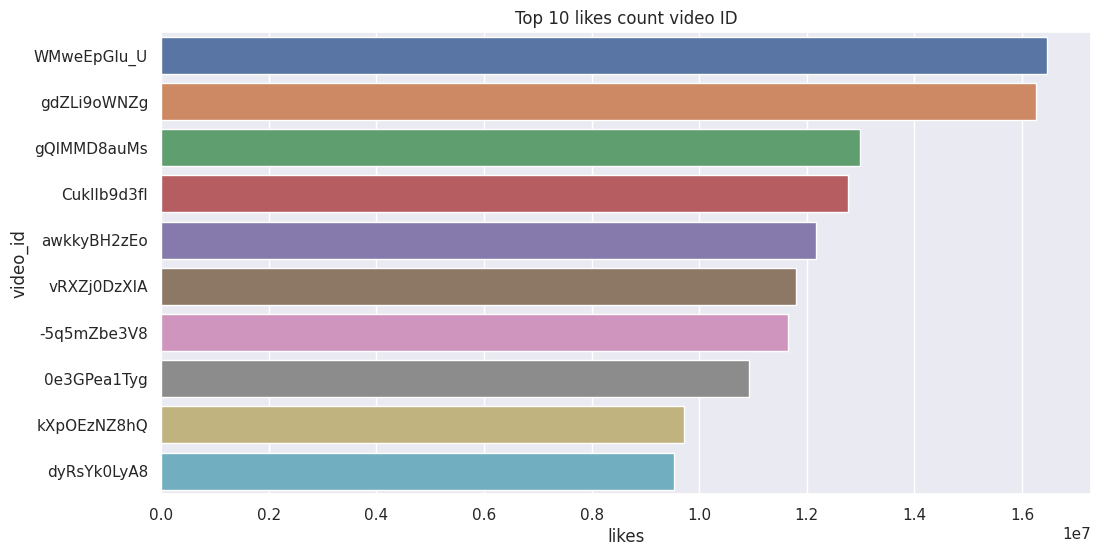

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(x='likes', y='video_id',data=df_sort_trending.sort_values(by='likes').nlargest(10, 'likes')).set(title='Top 10 likes count video ID')
plt.show()

In [81]:
likes_view=pd.DataFrame(df_remove_trend.groupby(["region"])["likes"].agg(["min","max","mean"]).reset_index())
likes_view
# since min =0, drop min
likes_view2 = likes_view.drop(['min'], axis=1)
likes_view2

,region,max,mean
0,BR,16213756,100356.337260
1,CA,16021548,124362.527525
2,DE,15460845,89490.028166
3,FR,15735588,63863.046725
4,GB,15246514,113018.682435
5,IN,16115240,120611.741929
6,JP,16369715,57768.838831
7,KR,16464253,73134.900930
8,MX,16213758,143793.346205
9,RU,14678180,44301.011387


[Text(0.5, 1.0, 'Mean Like count by region')]

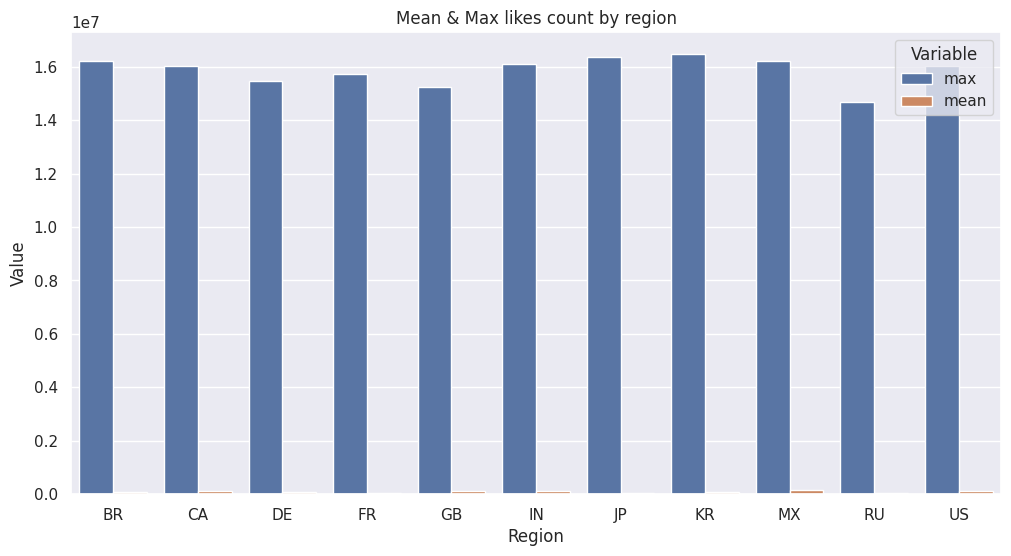

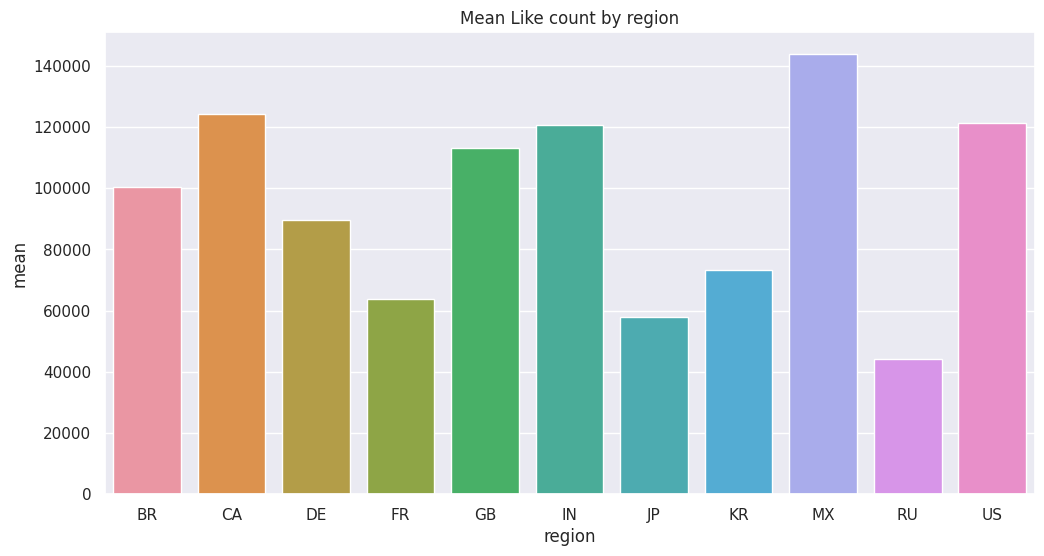

In [82]:
tidy_likes = likes_view2.melt(id_vars='region').rename(columns=str.title)
tidy_likes

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy_likes).set(title='Mean & Max likes count by region')

plt.figure(figsize=(12,6))
sns.barplot(x='region',y='mean',data=likes_view2).set(title='Mean Like count by region')

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Likes_count'),
 Text(0.5, 1.0, 'likes box plot by region')]

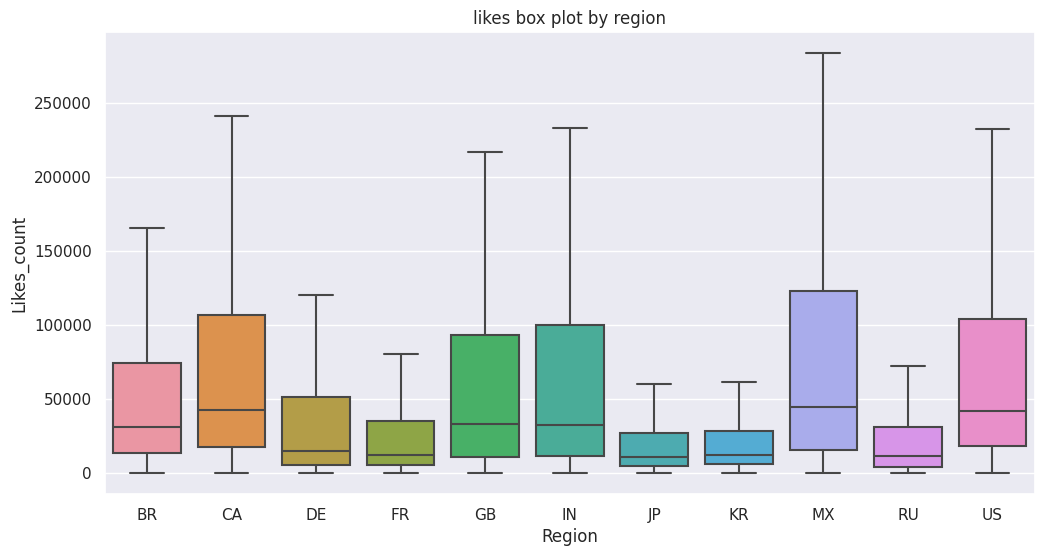

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='likes', data=df_remove_trend,showfliers=False).set(xlabel='Region',ylabel='Likes_count',title="likes box plot by region")

### 11. dislikes

In [84]:
df['dislikes'].describe()

count    2.607893e+06
mean     1.030821e+03
std      2.344960e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.060000e+02
max      1.234147e+07
Name: dislikes, dtype: float64

In [85]:
# df_sort_trending=consider video lastest trending date only
df.groupby('region')['dislikes'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
BR,240390.0,854.128346,7159.039790,0.0,0.0,0.0,316.0,848980.0
CA,240342.0,1305.266529,8651.772361,0.0,0.0,0.0,538.0,879357.0
DE,240336.0,979.351500,7404.672244,0.0,0.0,0.0,203.0,848975.0
FR,240388.0,532.097767,6387.820539,0.0,0.0,0.0,130.0,848977.0
GB,240391.0,1090.768107,7699.028391,0.0,0.0,0.0,374.0,865075.0
IN,227003.0,2582.741638,75746.792442,0.0,0.0,0.0,922.0,12341474.0
JP,240378.0,451.186822,7029.675847,0.0,0.0,0.0,154.0,879359.0
KR,237354.0,504.245258,7363.005823,0.0,0.0,0.0,172.0,879358.0
MX,240198.0,1173.915532,8131.886230,0.0,0.0,0.0,559.0,879359.0


In [86]:
df['dislikes'].min()

0

In [87]:
df['dislikes'].max()

12341474

In [88]:
df_sort_trending.sort_values(by='dislikes')[['video_id','title','trending_date','dislikes']].nlargest(10, 'dislikes')

,video_id,title,trending_date,dislikes
2070,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-22,12341474
3786,1RwQlgS4zQI,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,2020-08-31,1733752
4759,OExRBGfhLKc,Prime Minister Narendra Modi's Mann Ki Baat wi...,2020-09-05,1229004
7071,HARdHQb1Li4,Chocolate - Tony Kakkar ft. Riyaz Aly & Avneet...,2020-09-17,1152531
6477,PHw3Sia7KtY,"Beyonse Sharma Jayegi - Khaali Peeli | Ishaan,...",2020-09-14,1098465
4981,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-09-05,879357
3999,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-31,770145
2167,M0O7lLe4SmA,Cuties | Official Trailer | Netflix,2020-08-22,686745
985,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-16,467717
8038,DMlWjiVZRQk,Tehas Nehas - Khaali Peeli | Ishaan & Ananya |...,2020-09-22,401622


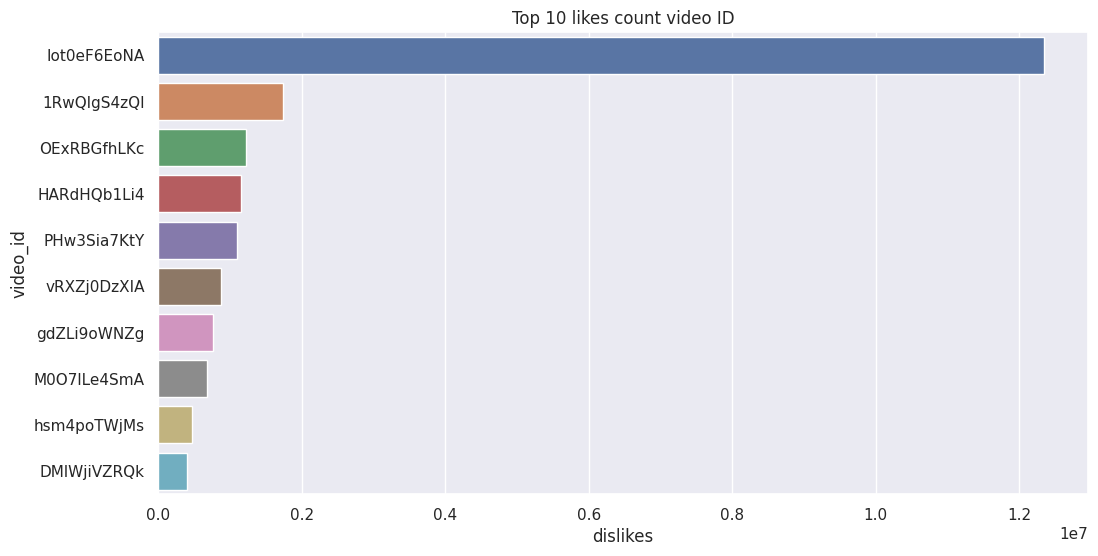

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x='dislikes', y='video_id',data=df_sort_trending.sort_values(by='dislikes').nlargest(10, 'dislikes')).set(title='Top 10 likes count video ID')
plt.show()

In [90]:
dislikes_view=pd.DataFrame(df_remove_trend.groupby(["region"])["dislikes"].agg(["min","max","mean"]).reset_index())
dislikes_view
# since min =0, drop min
dislikes_view2 = dislikes_view.drop(['min'], axis=1)
dislikes_view2

,region,max,mean
0,BR,848980,978.416798
1,CA,879357,1404.906500
2,DE,848975,1260.965097
3,FR,848977,566.099272
4,GB,865075,1260.758162
5,IN,12341474,1754.710070
6,JP,879359,565.712612
7,KR,879358,660.491915
8,MX,879359,1521.514895
9,RU,778804,564.464100


[Text(0.5, 1.0, 'Mean dislike count by region')]

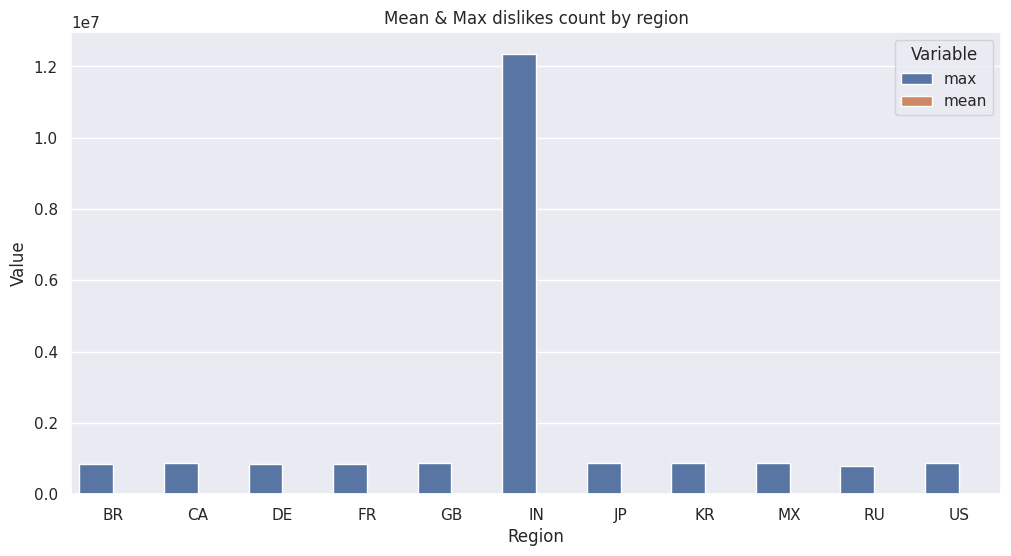

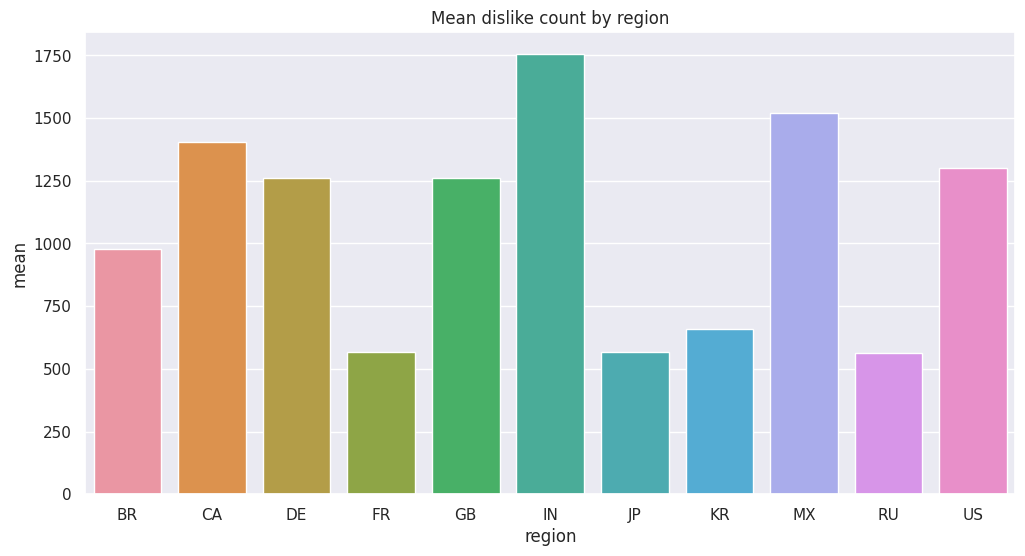

In [91]:
tidy_dislikes = dislikes_view2.melt(id_vars='region').rename(columns=str.title)
tidy_dislikes

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy_dislikes).set(title='Mean & Max dislikes count by region')

plt.figure(figsize=(12,6))
sns.barplot(x='region',y='mean',data=dislikes_view2).set(title='Mean dislike count by region')

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Dislikes_count'),
 Text(0.5, 1.0, 'Dislikes box plot by region')]

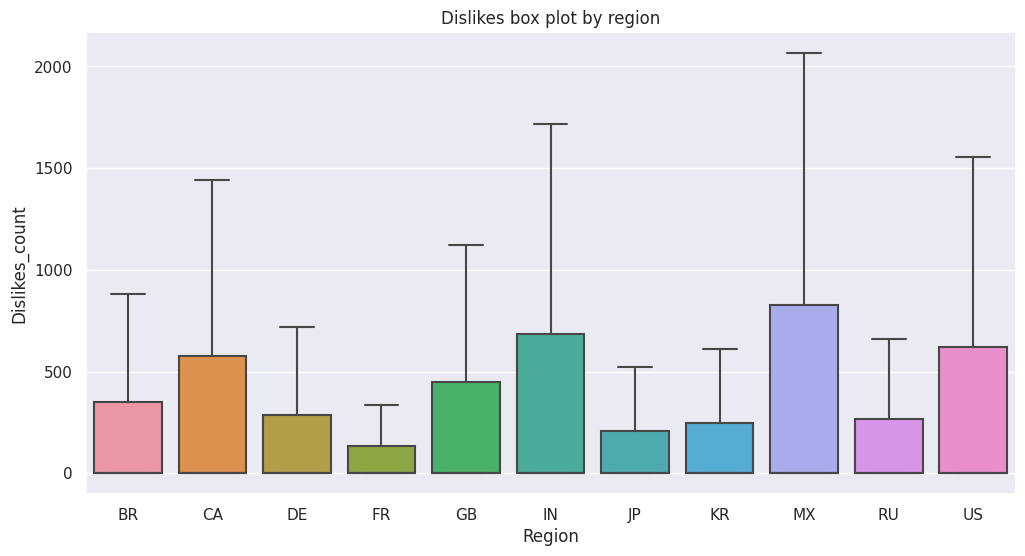

In [92]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='dislikes', data=df_remove_trend,showfliers=False).set(xlabel='Region',ylabel='Dislikes_count',title="Dislikes box plot by region")

### 12. comment_count

In [93]:
df['comment_count'].describe()

count    2.607893e+06
mean     7.509693e+03
std      7.209549e+04
min      0.000000e+00
25%      4.710000e+02
50%      1.287000e+03
75%      3.610000e+03
max      6.939302e+06
Name: comment_count, dtype: float64

In [94]:
df.groupby('region')['comment_count'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
BR,240390.0,7099.679051,75172.613880,0.0,414.0,1052.0,2760.0,6817450.0
CA,240342.0,9150.839816,69143.928619,0.0,1108.0,2524.0,5980.0,6738536.0
DE,240336.0,6431.620889,61844.751110,0.0,305.0,823.0,2732.0,5987755.0
FR,240388.0,4989.147478,62113.337213,0.0,249.0,558.0,1491.0,6065284.0
GB,240391.0,8274.338964,62549.053277,0.0,775.0,2013.0,5189.0,5987770.0
IN,227003.0,8689.377792,73584.033471,0.0,361.0,1181.0,4150.0,6738565.0
JP,240378.0,5768.638790,81155.767113,0.0,381.0,835.0,1921.0,6889393.0
KR,237354.0,7608.799687,93400.765173,0.0,520.0,1138.0,2626.0,6939302.0
MX,240198.0,9834.784003,80467.793289,0.0,708.0,1764.0,4878.0,6817451.0


In [95]:
df['comment_count'].min()

0

In [96]:
df['comment_count'].max()

6939302

In [97]:
df_sort_trending.sort_values(by='comment_count')[['video_id','title','trending_date','comment_count']].nlargest(10, 'comment_count')

,video_id,title,trending_date,comment_count
55138,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-06-04,6939302
3999,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-31,6303708
18935,-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,2020-12-01,4225989
6190,2L6gsn7rGqI,GAME (Full Video) Shooter Kahlon | Sidhu Moo...,2020-09-11,3607799
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-09-10,3534337
60740,2IkoKhr6Tss,EXO 엑소 'Don't fight the feeling' MV,2021-06-19,3119817
67539,CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2021-07-24,2903747
4981,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-09-05,2736022
133936,kXpOEzNZ8hQ,BTS (방탄소년단) 'Yet To Come (The Most Beautiful M...,2022-06-23,2626691
79542,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-22,2498669


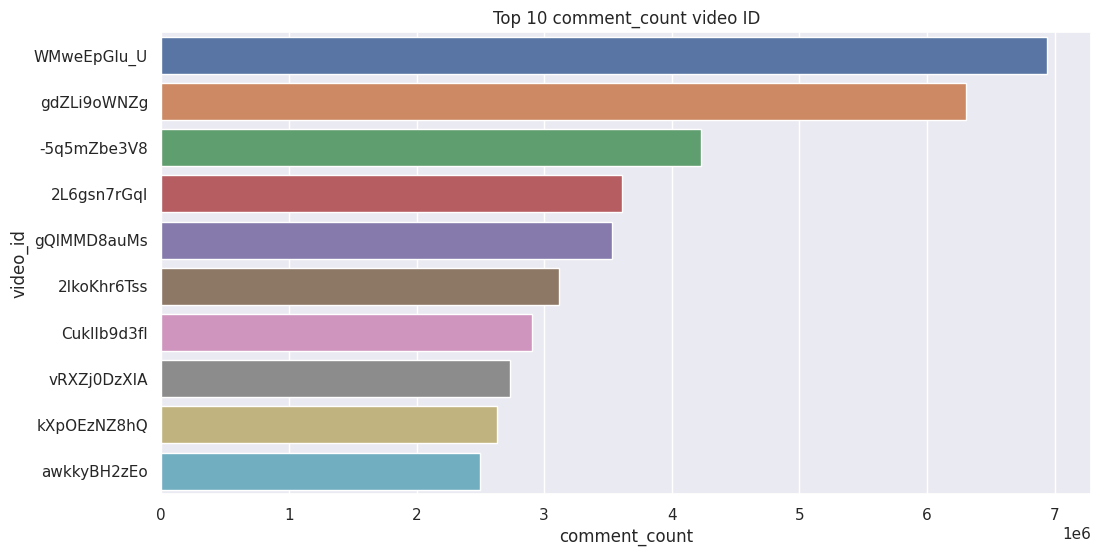

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x='comment_count', y='video_id',data=df_sort_trending.sort_values(by='comment_count').nlargest(10, 'comment_count')).set(title='Top 10 comment_count video ID')
plt.show()

In [99]:
comment_view=pd.DataFrame(df_remove_trend.groupby(["region"])["comment_count"].agg(["min","max","mean"]).reset_index())
comment_view
# since min =0, drop min
comment_view2 = comment_view.drop(['min'], axis=1)
comment_view2

,region,max,mean
0,BR,6817450,6751.514008
1,CA,6738536,8606.829706
2,DE,5987755,6420.966059
3,FR,6065284,4686.491751
4,GB,5987770,8187.070281
5,IN,6738565,6019.270565
6,JP,6889393,5706.287625
7,KR,6939302,7216.255258
8,MX,6817451,9779.427183
9,RU,5987787,3276.512202


[Text(0.5, 1.0, 'Mean comment count by region')]

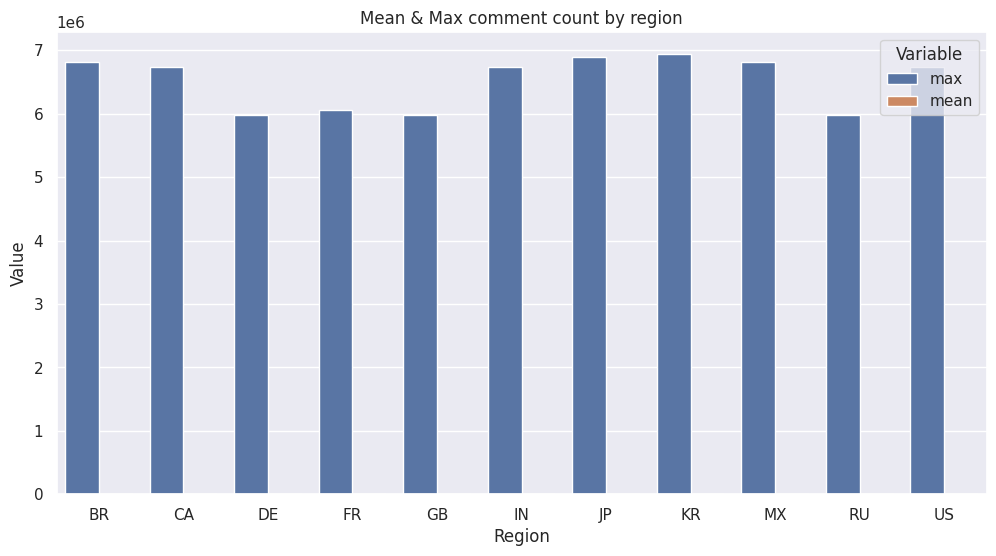

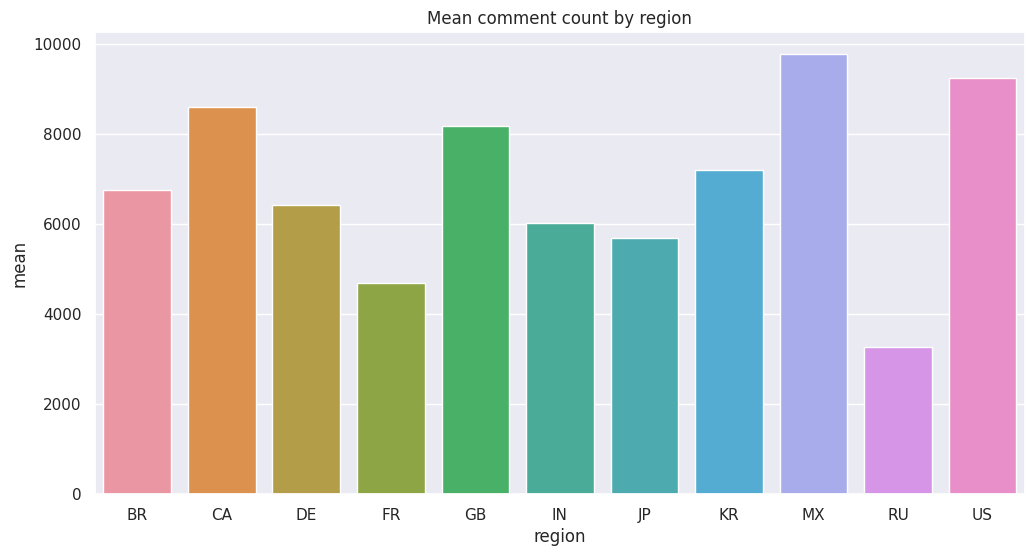

In [100]:
tidy_comment = comment_view2.melt(id_vars='region').rename(columns=str.title)
tidy_comment

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy_comment).set(title='Mean & Max comment count by region')

plt.figure(figsize=(12,6))
sns.barplot(x='region',y='mean',data=comment_view2).set(title='Mean comment count by region')

[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Comment_count'),
 Text(0.5, 1.0, 'Comment count box plot by region')]

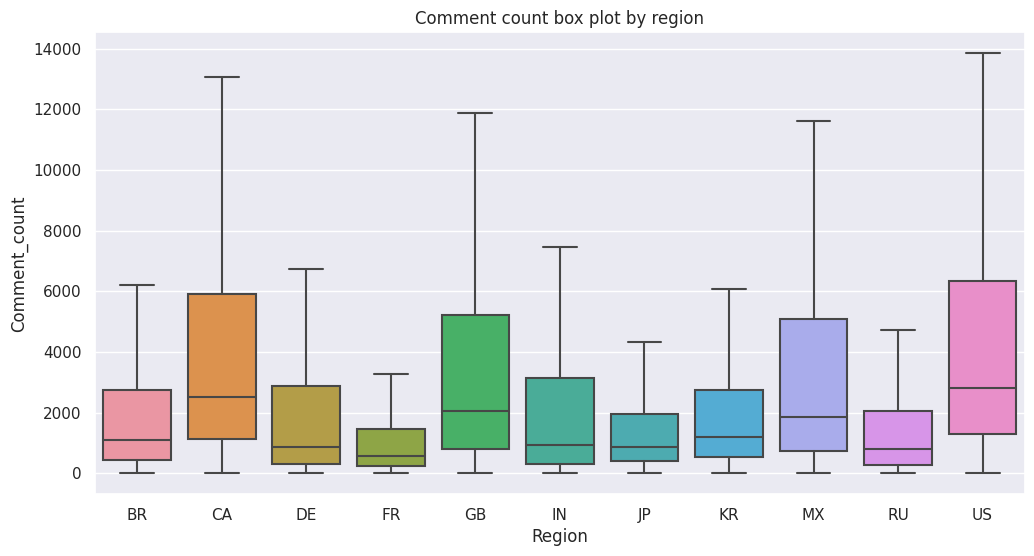

In [101]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='comment_count', data=df_remove_trend,showfliers=False).set(xlabel='Region',ylabel='Comment_count',title="Comment count box plot by region")

### 13. thumbnail_link

In [102]:
df['thumbnail_link'].describe()

count                                            2607893
unique                                            449693
top       https://i.ytimg.com/vi/2IkoKhr6Tss/default.jpg
freq                                                 151
Name: thumbnail_link, dtype: object

In [103]:
counts_df = df['thumbnail_link'].value_counts().rename_axis('thumbnail_link').reset_index(name='count')
counts_df

,thumbnail_link,count
0,https://i.ytimg.com/vi/2IkoKhr6Tss/default.jpg,151
1,https://i.ytimg.com/vi/S2dRcipMCpw/default.jpg,138
2,https://i.ytimg.com/vi/yhB3BgJyGl8/default.jpg,134
3,https://i.ytimg.com/vi/XA2YEHn-A8Q/default.jpg,131
4,https://i.ytimg.com/vi/6-kZmn54vOs/default.jpg,130
...,...,...
449688,https://i.ytimg.com/vi/l3wpE8w9mtc/default.jpg,1
449689,https://i.ytimg.com/vi/-Tdr33qY_C4/default.jpg,1
449690,https://i.ytimg.com/vi/GI4j2OxKMSk/default.jpg,1
449691,https://i.ytimg.com/vi/qz6A5t0nWUs/default.jpg,1


### 14. comments_disabled

0    False
1    False
2     True
3    False
4    False
Name: comments_disabled, dtype: bool
count     2607893
unique          2
top         False
freq      2571805
Name: comments_disabled, dtype: object
False    2571805
True       36088
Name: comments_disabled, dtype: int64


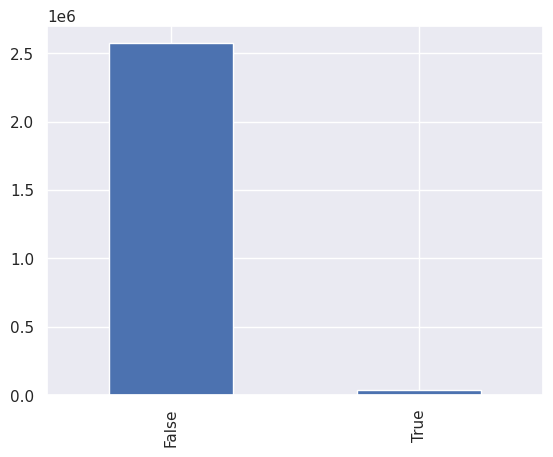

In [104]:
df['comments_disabled'].describe()

comments_disabled = df['comments_disabled']

# To see the first 5 rows of the 'comments_disabled' column
print(comments_disabled.head())

# To see the summary statistics of the 'comments_disabled' column
print(comments_disabled.describe())

# To see the frequency of each category
print(comments_disabled.value_counts())

# To plot a bar chart of the 'comments_disabled' column
comments_disabled.value_counts().plot(kind='bar')
plt.show()

### 15. ratings_disabled

0    False
1    False
2    False
3    False
4    False
Name: ratings_disabled, dtype: bool
count     2607893
unique          2
top         False
freq      2572281
Name: ratings_disabled, dtype: object
False    2572281
True       35612
Name: ratings_disabled, dtype: int64


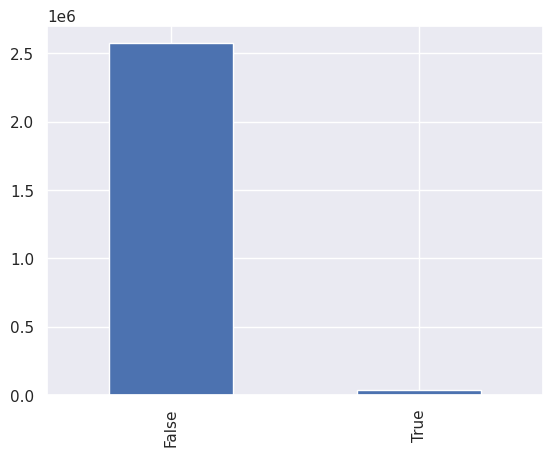

In [105]:
df['ratings_disabled'].describe()

ratings_disabled = df['ratings_disabled']

# To see the first 5 rows of the 'ratings_disabled' column
print(ratings_disabled.head())

# To see the summary statistics of the 'ratings_disabled' column
print(ratings_disabled.describe())

# To see the frequency of each category
print(ratings_disabled.value_counts())

# To plot a bar chart of the 'ratings_disabled' column
ratings_disabled.value_counts().plot(kind='bar')
plt.show()

### 16. description

0    Salve rapaziada, neste vídeo me declarei pra e...
1    ITZY Not Shy M/V[ITZY Official] https://www.yo...
2    Se inscrevam meus amores! 📬 Quer nos mandar al...
3    Você se unirá aos Lunari e aos Solari em Targo...
4    Danilo Gentili recebe Thammy Miranda. Após pas...
Name: description, dtype: object
count           2607893
unique           416990
top       Not Available
freq              79323
Name: description, dtype: object
0          926
1          301
2          334
3          550
4         1167
          ... 
240382     822
240383     979
240384      99
240385     302
240386     628
Name: description, Length: 2607893, dtype: int64


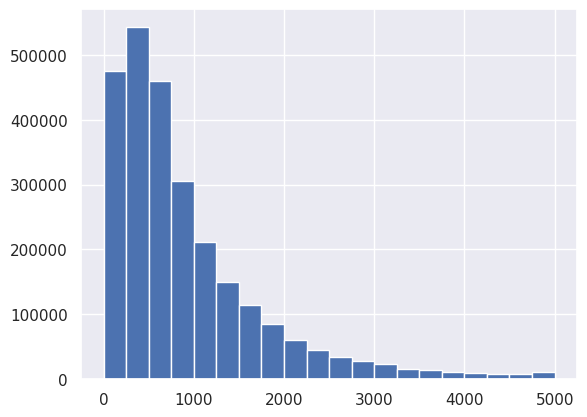

In [106]:
description = df['description']

# To see the first 5 rows of the 'description' column
print(description.head())

# To see the summary statistics of the 'description' column
print(description.describe())

# To see the length of each description
description_length = description.str.len()
print(description_length)

# To plot a histogram of the lengths
plt.hist(description_length.dropna(), bins=20)
plt.show()

### 17. region

0    BR
1    BR
2    BR
3    BR
4    BR
Name: region, dtype: object
count     2607893
unique         11
top            GB
freq       240391
Name: region, dtype: object
GB    240391
BR    240390
FR    240388
US    240387
JP    240378
CA    240342
DE    240336
MX    240198
KR    237354
IN    227003
RU    220726
Name: region, dtype: int64


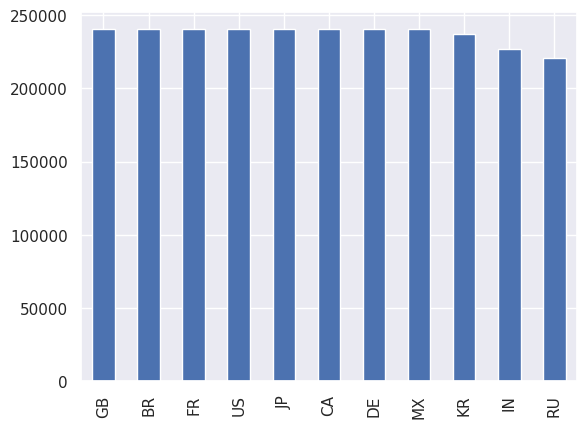

In [107]:
region = df['region']

# To see the first 5 rows of the 'region' column
print(region.head())

# To see the summary statistics of the 'region' column
print(region.describe())

# To see the frequency of each category
print(region.value_counts())

# To plot a bar chart of the 'region' column
region.value_counts().plot(kind='bar')
plt.show()

## Correlation

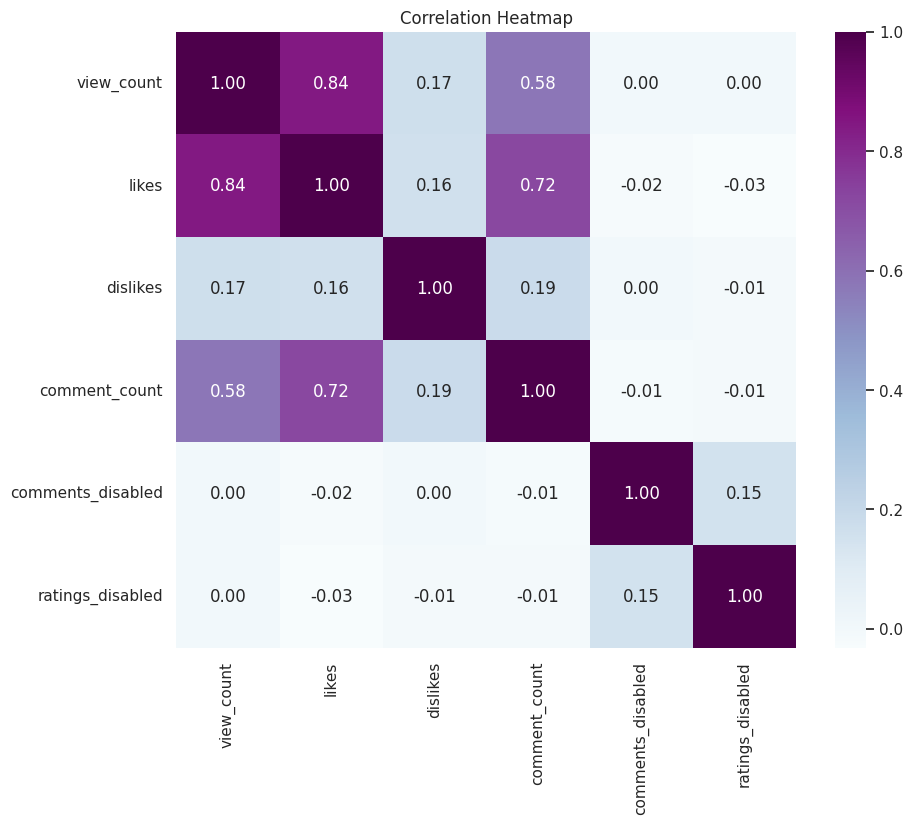

In [108]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## EDA questions


### Q1 : What is the top 3 ranking video in each region ?

Conclusion:\
Among 11 region, top 3 only containes 6 unique video where other are common trending video.
1. 'BLACKPINK - ‘Pink Venom’ M/V'
2. "BTS (방탄소년단) 'Butter' Official MV"
3. "BTS (방탄소년단) 'Dynamite' Official MV"
4. 'Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sanon | Ammy Virk | BPraak | Jaani | Arvindr Khaira'
5. 'JETSKI WAX PRANK!! 🤣 - #Shorts'
6. "LISA - 'LALISA' M/V"

In [109]:
df_view = df_remove_trend.sort_values(['region','view_count'],ascending=False)

#top 3 ranking for each region
video_ranking=df_view.groupby(['region'])['region','title','video_id','trending_date','view_count'].head(3)
video_ranking

,region,title,video_id,trending_date,view_count
152788,US,BLACKPINK - ‘Pink Venom’ M/V,gQlMMD8auMs,2022-09-10,277791741
56374,US,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-05-30,264407389
3358,US,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-28,232649205
2487,RU,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-24,183532509
55880,RU,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-05-23,166895681
145561,RU,BLACKPINK - ‘Pink Venom’ M/V,gQlMMD8auMs,2022-08-23,163821398
56991,MX,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-06-01,278080610
3594,MX,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-30,253995993
150366,MX,BLACKPINK - ‘Pink Venom’ M/V,gQlMMD8auMs,2022-08-30,224291166
55138,KR,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-06-04,296314174


In [110]:
print("Total unique video: " + str(video_ranking['video_id'].nunique()))
print(video_ranking['video_id'].unique())
print(video_ranking['title'].unique())

Total unique video: 6
['gQlMMD8auMs' 'WMweEpGlu_U' 'gdZLi9oWNZg' 'DUwlGduupRI' 'qF0N19MgI3Q'
 'awkkyBH2zEo']
['BLACKPINK - ‘Pink Venom’ M/V' "BTS (방탄소년단) 'Butter' Official MV"
 "BTS (방탄소년단) 'Dynamite' Official MV"
 'Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sanon | Ammy Virk | BPraak | Jaani | Arvindr Khaira'
 'JETSKI WAX PRANK!! 🤣 - #Shorts' "LISA - 'LALISA' M/V"]


Text(0.5, 1.0, 'top 3 video ranking in each')

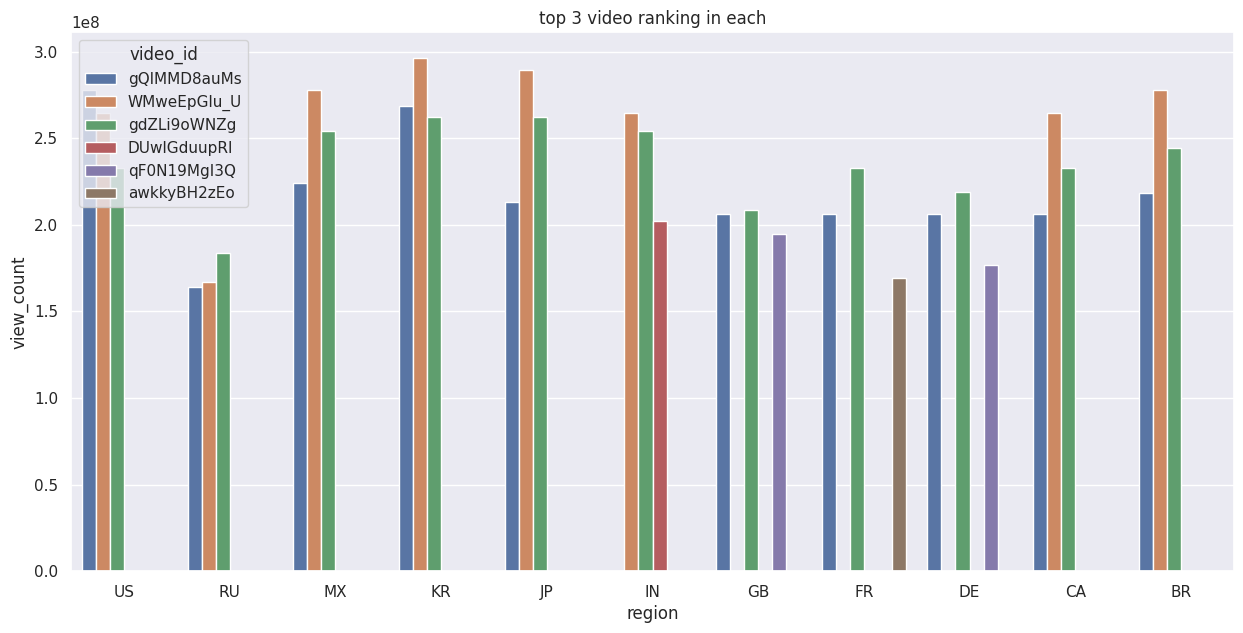

In [111]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x='region',y='view_count',hue='video_id',data=video_ranking).set_title('top 3 video ranking in each')

### Q2 : What is the top 3 likes video in each region ?





#### Likes

Total unique video: 4
1. "BTS (방탄소년단) 'Butter' Official MV"
2. "BTS (방탄소년단) 'Dynamite' Official MV"
3. 'BLACKPINK - ‘Pink Venom’ M/V'
4. "BTS (방탄소년단) 'Permission to Dance' Official MV"

In [112]:
df_likes = df_remove_trend.sort_values(['region','likes'],ascending=False)

#top 3 ranking for each region
likes_ranking=df_likes.groupby(['region'])['region','title','video_id','trending_date','likes'].head(3)
likes_ranking

,region,title,video_id,trending_date,likes
56374,US,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-05-30,16021534
3358,US,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-28,15735533
152788,US,BLACKPINK - ‘Pink Venom’ M/V,gQlMMD8auMs,2022-09-10,12993894
2487,RU,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-24,14678180
55880,RU,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-05-23,14202588
67010,RU,BTS (방탄소년단) 'Permission to Dance' Official MV,CuklIb9d3fI,2021-07-12,11357978
56991,MX,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-06-01,16213758
3594,MX,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-30,16115288
69380,MX,BTS (방탄소년단) 'Permission to Dance' Official MV,CuklIb9d3fI,2021-07-19,12403586
55138,KR,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-06-04,16464253


In [113]:
print("Total unique video: " + str(likes_ranking['video_id'].nunique()))
print(likes_ranking['video_id'].unique())
print(likes_ranking['title'].unique())

Total unique video: 4
['WMweEpGlu_U' 'gdZLi9oWNZg' 'gQlMMD8auMs' 'CuklIb9d3fI']
["BTS (방탄소년단) 'Butter' Official MV" "BTS (방탄소년단) 'Dynamite' Official MV"
 'BLACKPINK - ‘Pink Venom’ M/V'
 "BTS (방탄소년단) 'Permission to Dance' Official MV"]


Text(0.5, 1.0, 'top 3 likes ranking in each')

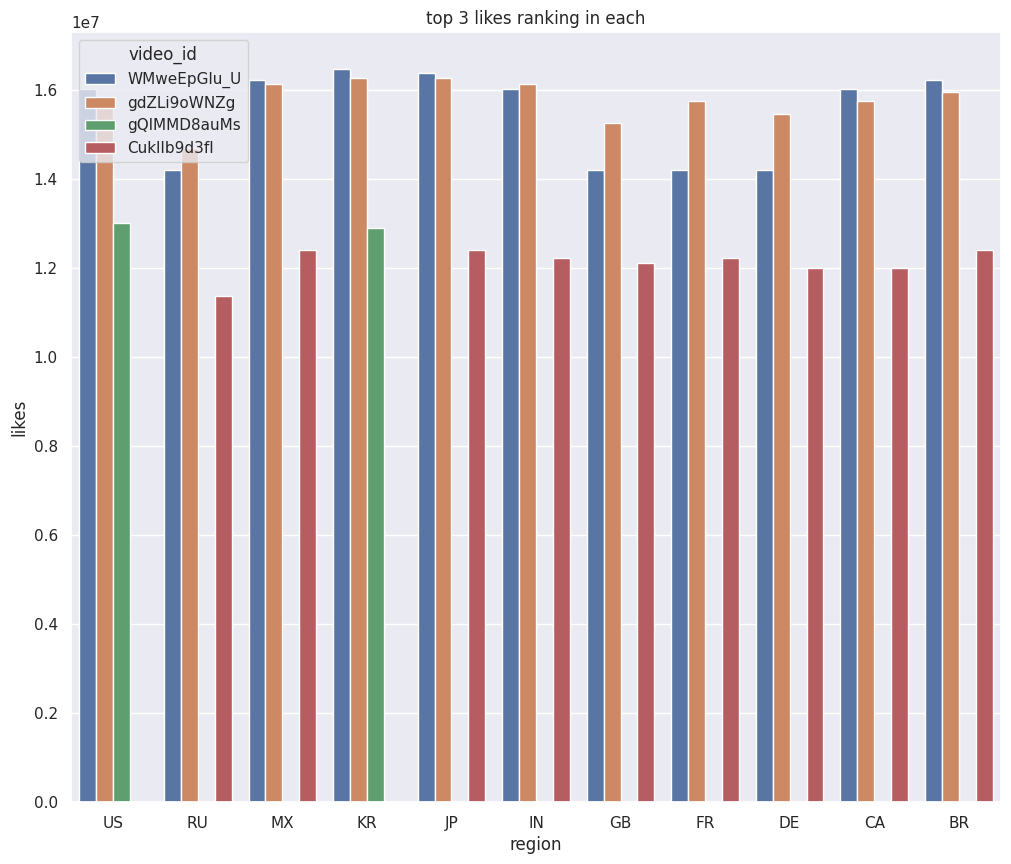

In [114]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='region',y='likes',hue='video_id',data=likes_ranking).set_title('top 3 likes ranking in each')

### Q3: What is the top 3 dislike count video in each region ?

#### Dislikes

Total unique dislikes video only 7
Most of the common dislikes videos are
1. "BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V"
2. "BTS (방탄소년단) 'Dynamite' Official MV"
3. 'Cardi B - WAP feat. Megan Thee Stallion [Official Music Video]'

RU & IN holds some unique videos which is not common\
RU
4. 'Cuties | Official Trailer | Netflix'

IN
5. 'Sadak 2 | Official Trailer | Sanjay | Pooja | Alia | Aditya | Jisshu | Mahesh Bhatt | 28 Aug'
6.  'Khaali Peeli | Teaser | Ishaan | Ananya Panday | Maqbool Khan | Coming Soon'
7.  "Prime Minister Narendra Modi's Mann Ki Baat with the Nation, August 2020"

In [115]:
df_dislikes = df_remove_trend.sort_values(['region','dislikes'],ascending=False)

#top 3 ranking for each region
dislikes_ranking=df_dislikes.groupby(['region'])['region','title','video_id','trending_date','dislikes'].head(3)
dislikes_ranking

,region,title,video_id,trending_date,dislikes
4980,US,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,vRXZj0DzXIA,2020-09-05,879354
3358,US,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-28,714194
985,US,Cardi B - WAP feat. Megan Thee Stallion [Offic...,hsm4poTWjMs,2020-08-16,467717
3948,RU,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,vRXZj0DzXIA,2020-08-31,778804
2167,RU,Cuties | Official Trailer | Netflix,M0O7lLe4SmA,2020-08-22,686745
2487,RU,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-24,576865
4799,MX,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,vRXZj0DzXIA,2020-09-05,879359
3594,MX,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-30,756701
997,MX,Cardi B - WAP feat. Megan Thee Stallion [Offic...,hsm4poTWjMs,2020-08-16,467727
3426,KR,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,vRXZj0DzXIA,2020-09-05,879358


In [116]:
print("Total unique video: " + str(dislikes_ranking['video_id'].nunique()))
print(dislikes_ranking['video_id'].unique())
print(dislikes_ranking['title'].unique())

Total unique video: 7
['vRXZj0DzXIA' 'gdZLi9oWNZg' 'hsm4poTWjMs' 'M0O7lLe4SmA' 'Iot0eF6EoNA'
 '1RwQlgS4zQI' 'OExRBGfhLKc']
["BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V"
 "BTS (방탄소년단) 'Dynamite' Official MV"
 'Cardi B - WAP feat. Megan Thee Stallion [Official Music Video]'
 'Cuties | Official Trailer | Netflix'
 'Sadak 2 | Official Trailer | Sanjay | Pooja | Alia | Aditya | Jisshu | Mahesh Bhatt | 28 Aug'
 'Khaali Peeli | Teaser | Ishaan | Ananya Panday | Maqbool Khan | Coming Soon'
 "Prime Minister Narendra Modi's Mann Ki Baat with the Nation, August 2020"]


Text(0.5, 1.0, 'top 3 dislikes ranking in each region')

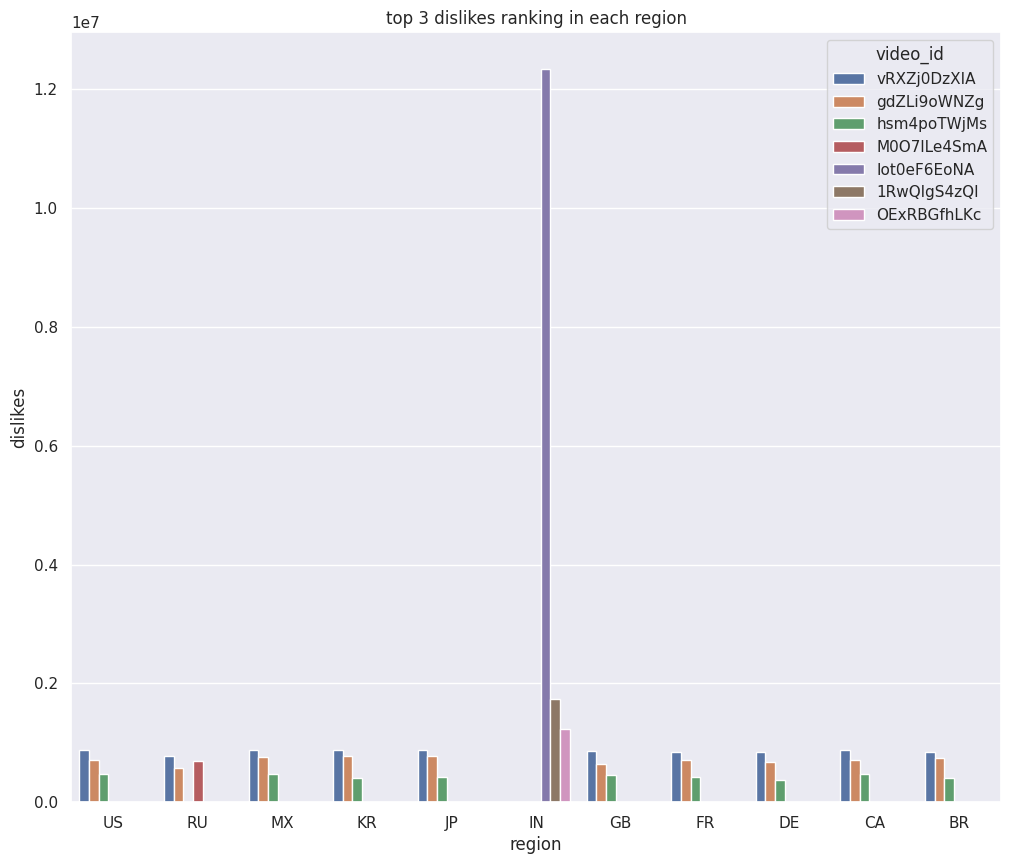

In [117]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='region',y='dislikes',hue='video_id',data=dislikes_ranking).set_title('top 3 dislikes ranking in each region')

### Q4 : What is the top 3 comment count video in each region ?

only 3 unique videos among 11 countries which means all the top 3 trending videos with highest comment counts is the same
1. "BTS (방탄소년단) 'Butter' Official MV"
2. "BTS (방탄소년단) 'Dynamite' Official MV"
3. "BTS (방탄소년단) 'Life Goes On' Official MV"

In [118]:
df_comment = df_remove_trend.sort_values(['region','comment_count'],ascending=False)

#top 3 ranking for each region
comment_ranking=df_comment.groupby(['region'])['region','title','video_id','trending_date','comment_count'].head(3)
comment_ranking

,region,title,video_id,trending_date,comment_count
56374,US,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-05-30,6738537
3358,US,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-28,6065230
21367,US,BTS (방탄소년단) 'Life Goes On' Official MV,-5q5mZbe3V8,2020-11-28,4160903
55880,RU,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-05-23,5987787
2487,RU,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-24,5748681
20313,RU,BTS (방탄소년단) 'Life Goes On' Official MV,-5q5mZbe3V8,2020-11-23,3913352
56991,MX,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-06-01,6817451
3594,MX,BTS (방탄소년단) 'Dynamite' Official MV,gdZLi9oWNZg,2020-08-30,6249723
21182,MX,BTS (방탄소년단) 'Life Goes On' Official MV,-5q5mZbe3V8,2020-11-28,4160939
55138,KR,BTS (방탄소년단) 'Butter' Official MV,WMweEpGlu_U,2021-06-04,6939302


In [119]:
print("Total unique video: " + str(comment_ranking['video_id'].nunique()))
print(comment_ranking['video_id'].unique())
print(comment_ranking['title'].unique())

Total unique video: 3
['WMweEpGlu_U' 'gdZLi9oWNZg' '-5q5mZbe3V8']
["BTS (방탄소년단) 'Butter' Official MV" "BTS (방탄소년단) 'Dynamite' Official MV"
 "BTS (방탄소년단) 'Life Goes On' Official MV"]


Text(0.5, 1.0, 'top 3 comment count ranking in each region')

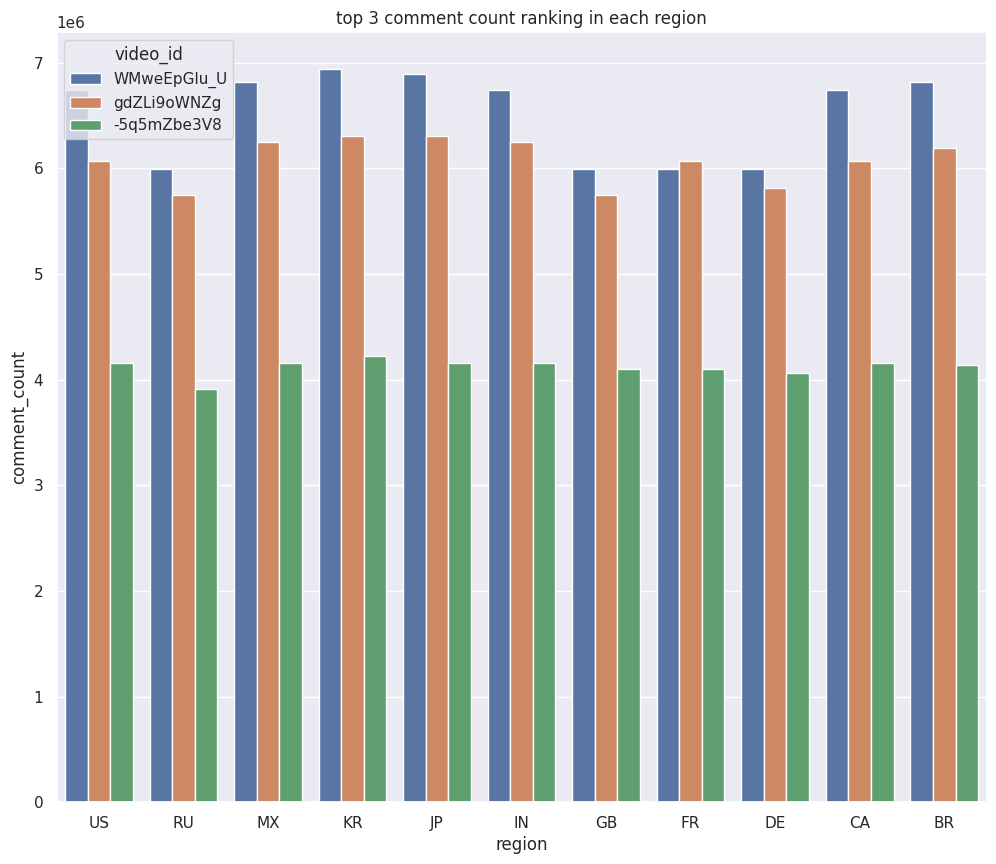

In [120]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='region',y='comment_count',hue='video_id',data=comment_ranking).set_title('top 3 comment count ranking in each region')

###Q5: What are the top 10 most viewed channel title?
- HYBE LABELS
- BLACKPINK
- Big Hit Labels
- FFUNTV
- DM - Desi Melodies
- Bizarrap
- Julius Dein
- KarolGVEVO
- How Ridiculous
- Dan Rhodes


In [121]:
top_10_videos_most_viewed = trending_videos_until_today.groupby(['channelTitle']).max().sort_values('view_count',ascending=False).loc[:,'view_count'][:10]
top_10_videos_most_viewed = top_10_videos_most_viewed.reset_index()
top_10_videos_most_viewed

,channelTitle,view_count
0,HYBE LABELS,296314174
1,BLACKPINK,277791741
2,Big Hit Labels,262319276
3,FFUNTV,206202284
4,DM - Desi Melodies,202091414
5,Bizarrap,198682756
6,Julius Dein,194625542
7,KarolGVEVO,173149160
8,How Ridiculous,171221005
9,Dan Rhodes,164362471


###Q6: What is the top 10 most frequent type of video in trending?

- Entertainment, Music, Gaming, People & Blogs, Sports, Comedy, News & Politics, Film & Animation, Howto & Style, and Science & Technology

In [122]:
most_frequent_type=df.groupby(['categoryId']).count().sort_values('video_id',ascending=False).loc[:,'video_id'][:10]
most_frequent_type=most_frequent_type.reset_index()
most_frequent_type=most_frequent_type.rename(columns={'video_id': 'count'})

for idx,most_freq_category in enumerate(most_frequent_type['categoryId']):
    for category in df_cat['items']:
        if str(most_freq_category)==category['id']:
            most_frequent_type.at[idx,'category_name']=category['snippet']['title']
            break

print(most_frequent_type)

   categoryId   count         category_name
0          24  666272         Entertainment
1          10  398755                 Music
2          20  356791                Gaming
3          22  304176        People & Blogs
4          17  277930                Sports
5          23  139833                Comedy
6          25   98671       News & Politics
7           1   80286      Film & Animation
8          26   74613         Howto & Style
9          28   61553  Science & Technology


###Q7: What are the top 10 most commonly used tags in videos which has high views?

- Funny, minecraft, comedy, BTS, challenge, highlights, vlog, video, football, shorts

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract videos with views greater than or equal to 1 million
high_views = df[df['view_count'] >= 1000000]

# Filter out rows where 'tags' is equal to '[None]'
high_views = high_views[high_views['tags'] != '[None]']

# Combine all tags from the selected videos into a single list
all_tags = high_views['tags'].str.split('|').tolist()
all_tags = [tag for tags in all_tags for tag in tags]

# Count the occurrence of each tag
tag_counts = pd.Series(all_tags).value_counts()

print(tag_counts.head(10))


funny         30340
minecraft     22639
comedy        22293
BTS           16133
challenge     15434
highlights    12710
vlog          12595
video         11436
football      11380
shorts        10775
dtype: int64


## Conclusion

This project mainly focus to identify the trending videos, channel, type in different region and country so that we can know the public preference and create more trending videos.

From the above practice, we know that
- BTS and BlackPink are worldwide well-known. Their videos are in the top 3 ranking video, both most like and dislike videos, and in top 3 most comments video.
- The top view channel is HYBE LABELS.
- Most popular type of video is entertainment video
- Most commonly used tags is funny.   